# Importación de librerias y carga de la base de datos a usar

In [1]:
#Importando las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import BayesLib as bl

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *

In [2]:
#abriendo el conjunto de datos desde un archivo CSV y asignandolo los datos al DataFrame "df"
df = pd.read_csv('dataset_a.csv', sep=';', error_bad_lines=False)

# Análisis de datos 1D

En el análisis 1D se realiza una primera aproximación de los datos, se realiza el estudio de las siguientes preguntas:

1. ¿Cuál es la dimensión de la base de datos utilizada?
2. ¿Contiene valores nulos "NaN" que deban ser tratados?
3. ¿Cuál es la caracteristica de cada variable (columna) de la base de datos?
4. ¿Existen variables que no son un aporte al análisis?
5. ¿Cúal es el analisis descriptivo de los datos?
6. ¿Existen variables categoricas que se deban transformar numéricamente?

In [3]:
#identificando el número de filas y columnas que contiene el DataFrame "df"
print(df.shape)

(467, 80)


In [4]:
#identificando las columnas con valores nulos "NaN"
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [5]:
#identificando las caracteristicas del dataset a nivel de tipos de datos y que columnas tienen valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rut         467 non-null    int64  
 1   usuario     467 non-null    object 
 2   correo      467 non-null    object 
 3   nombre      467 non-null    object 
 4   profesor    467 non-null    object 
 5   i1          467 non-null    float64
 6   f1          467 non-null    float64
 7   t1          467 non-null    float64
 8   r1          467 non-null    int64  
 9   p1          467 non-null    int64  
 10  s1          467 non-null    object 
 11  l1          467 non-null    int64  
 12  i2          467 non-null    float64
 13  f2          467 non-null    float64
 14  t2          467 non-null    float64
 15  r2          467 non-null    int64  
 16  p2          467 non-null    int64  
 17  s2          467 non-null    object 
 18  l2          467 non-null    int64  
 19  i3          467 non-null    f

In [6]:
%%capture
#Eliminando variables que no aportan al análisis
df = df.drop([
    'rut', 'usuario', 'correo', 'nombre', 'profesor', 
    'i1', 'f1', 's1', 
    'i2', 'f2', 's2',
    'i3', 'f3', 's3', 
    'i4', 'f4', 's4', 
    'i5', 'f5', 's5', 
    'i6', 'f6', 's6',
    'sol1', 'sol2', 'sol3', 'sol4',
    'tarea1', 'tarea2',
    'controles', 'np', 'examen'], axis=1)

In [7]:
#Analisis descriptivo de los datos
df.describe()

t1          r1          p1          l1           t2  \
count  467.000000  467.000000  467.000000  467.000000   467.000000   
mean   101.104817    2.179872   12.370450    8.856531    90.699059   
std    110.090207    2.675148   20.590161    3.801227    92.952985   
min     14.947463    0.000000    1.000000    7.000000    17.714780   
25%     41.700748    1.000000    2.000000    7.000000    46.058281   
50%     65.350279    1.000000    7.000000    7.000000    67.506870   
75%    116.476445    2.000000   12.500000    9.000000   104.718704   
max    962.077675   26.000000  214.000000   44.000000  1092.332500   

               r2          p2          l2           t3          r3  ...  \
count  467.000000  467.000000  467.000000   467.000000  467.000000  ...   
mean     1.897216   10.758030   11.417559   169.270350    2.199143  ...   
std      1.899326   11.804347    3.201923   117.380853    1.826415  ...   
min      1.000000    2.000000   10.000000    27.226233    1.000000  ...   
25%      1.000000    5.000000   10.000000    88.981408    1.000000  ...   
50%      1.000000    9.000000   10.000000   131.983587    1.000000  ...   
75%      2.000000   12.000000   12.000000   214.802128    3.000000  ...   
max     24.000000  124.000000   29.000000  1080.815802   14.000000  ...   

               lt           tt          pt  game_score       score  \
count  467.000000   467.000000  467.000000  467.000000  467.000000   
mean    78.284797   580.860696   68.402570   18.531029    7.077088   
std     18.204084   286.479239   51.589755    6.872696    2.156547   
min     61.000000   177.997170   11.000000    9.682934    1.000000   
25%     66.000000   384.790510   37.000000   13.995174    6.000000   
50%     73.000000   509.651843   55.000000   17.100026    7.000000   
75%     85.000000   700.930958   83.500000   20.946877    9.000000   
max    191.000000  2262.968067  623.000000   84.472331   12.000000   

          score_a     score_p     score_d     score_s       final  
count  467.000000  467.000000  467.000000  467.000000  467.000000  
mean     4.404711    3.199143    2.197002    2.222698    5.331049  
std      1.546497    1.323670    1.033636    0.875071    1.287560  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      3.000000    2.000000    1.000000    2.000000    4.900000  
50%      4.000000    3.000000    2.000000    2.000000    5.600000  
75%      5.500000    4.000000    3.000000    3.000000    6.200000  
max      8.000000    5.000000    4.000000    4.000000    7.000000  

[8 rows x 46 columns]

Estadísticas sobre variables NO numéricas para su posterior reemplazo por valores continuos

In [8]:
#Estadísticas de la variable "programa"
serie = df['programa'].value_counts(normalize=True, ascending=True)*100
print(serie)

#Transformación numérica de la variable "programa"
for i in range(len(serie)):
    df["programa"] = df["programa"].str.replace(serie.index[i], str(i+1))
  
serie = df['programa'].value_counts(normalize=True, ascending=True)*100
print(serie)

df['programa'] = df['programa'].astype('int')

BACHILLERATO EN CIENCIAS                    0.428266
INGENIERIA INDUSTRIAL                       6.638116
INGENIERIA CIVIL INFORMATICA               23.340471
INGENIERIA EN COMPUTACION E INFORMATICA    29.336188
INGENIERIA CIVIL INDUSTRIAL                40.256959
Name: programa, dtype: float64
1     0.428266
2     6.638116
3    23.340471
4    29.336188
5    40.256959
Name: programa, dtype: float64


In [9]:
#Estadísticas de la variable "estado"
serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

#Transformacíon numérica de la variable "estado"
for i in range(len(serie)):
    df["estado"] = df["estado"].str.replace(serie.index[i], str(i))

serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

df['estado'] = df['estado'].astype('int')

A    89.507495
R    10.492505
Name: estado, dtype: float64
0    89.507495
1    10.492505
Name: estado, dtype: float64


In [10]:
#identificando las nuevas caracteristicas del dataset a nivel de tipos de datos y que columnas tienen valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   t1          467 non-null    float64
 1   r1          467 non-null    int64  
 2   p1          467 non-null    int64  
 3   l1          467 non-null    int64  
 4   t2          467 non-null    float64
 5   r2          467 non-null    int64  
 6   p2          467 non-null    int64  
 7   l2          467 non-null    int64  
 8   t3          467 non-null    float64
 9   r3          467 non-null    int64  
 10  p3          467 non-null    int64  
 11  l3          467 non-null    int64  
 12  t4          467 non-null    float64
 13  r4          467 non-null    int64  
 14  p4          467 non-null    int64  
 15  l4          467 non-null    int64  
 16  t5          467 non-null    float64
 17  r5          467 non-null    int64  
 18  p5          467 non-null    int64  
 19  l5          467 non-null    i

# Análisis 2D

En el análisis 2D se realiza un estudio más profundo respecto a la relación entre las variables.  Se analiza lo siguiente:

1. Se crean los histogramas utilizando todas las variables para visualizar cuales de ellas tienen una correlación positiva.
2. Se seleccionan aquellas variables con una mayor correlación positiva. Tarea manual y de observación.
3. se acota el histograma con las variables mayormente correlacionadas.
4. Se identifican las variables categóricas y se seleccionan. Tarea manual y de observación.
5. Se realizan tablas de contingencia para registrar y analizar la asociación entre dos o más variables.

In [11]:
#obtener el plot completo de todas las variables
#sns.pairplot(df);

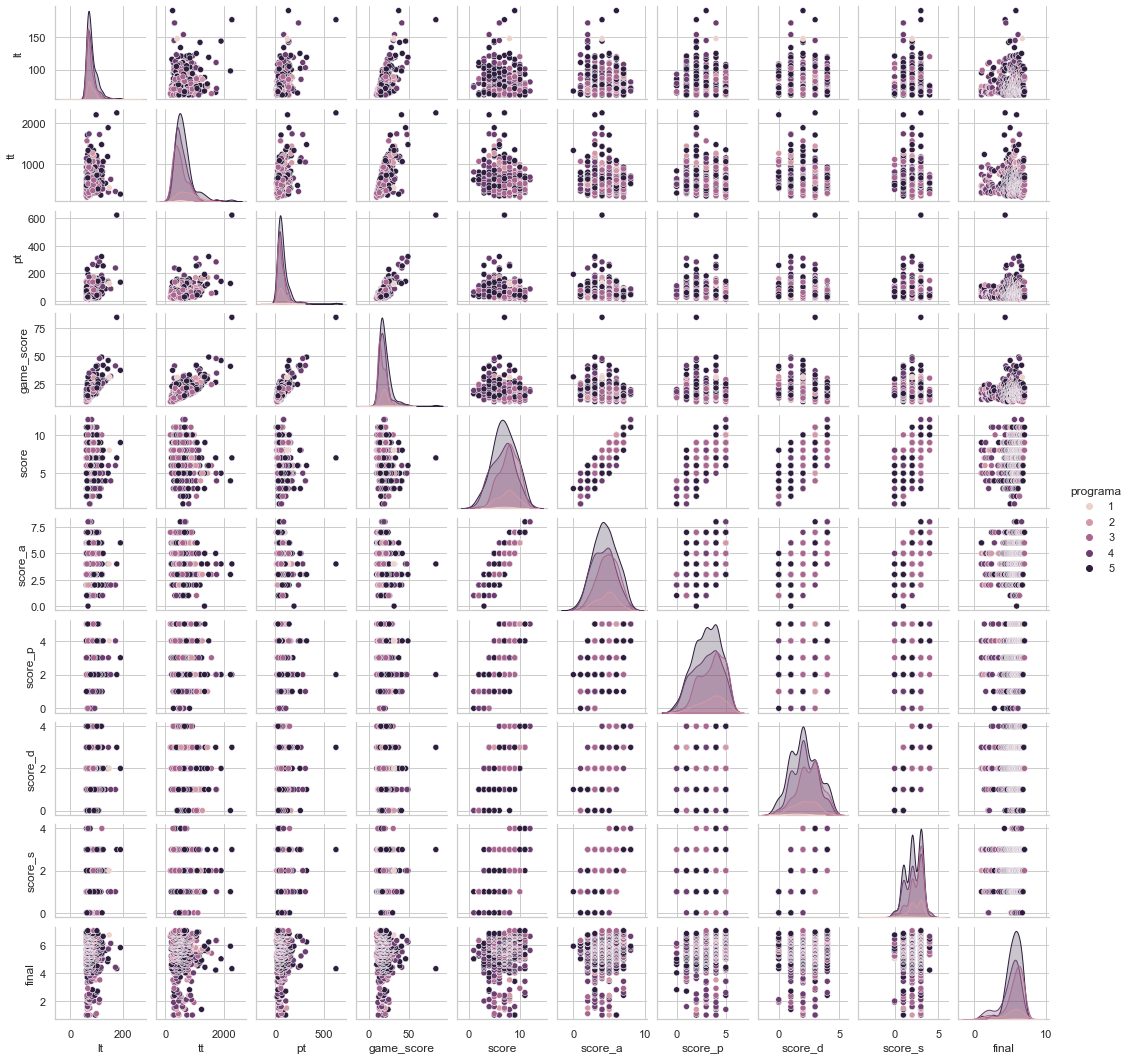

In [12]:
#realizando el plot de las variables identificadas como más correlacionadas.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, 
             x_vars=['lt','tt','pt','game_score','score','score_a','score_p','score_d','score_s','final'],
             y_vars=['lt','tt','pt','game_score','score','score_a','score_p','score_d','score_s','final'],
             height=1.5, hue='programa');
plt.show()

Obteniendo tablas de contingencia de las variables categóricas para analizar comportamientos

In [13]:
#Se obtiene la tabla de contingencia de "programa" vs "estado" obteniendo la normalización 
#de los datos respecto a todos los programas
pd.crosstab(df.programa, df.estado, normalize='all', margins=True)\
    .round(4)*100

estado        0      1     All
programa                      
1          0.43   0.00    0.43
2          5.14   1.50    6.64
3         21.20   2.14   23.34
4         24.41   4.93   29.34
5         38.33   1.93   40.26
All       89.51  10.49  100.00

In [14]:
#Se obtiene la tabla de contingencia de "op1" vs "sv1" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op1, df.sv1, normalize='all', margins=True)\
    .round(4)*100

sv1     0      1     All
op1                     
0    2.14  42.18   44.33
1    0.00  55.67   55.67
All  2.14  97.86  100.00

In [15]:
#Se obtiene la tabla de contingencia de "op2" vs "sv2" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op2, df.sv2, normalize='all', margins=True)\
    .round(4)*100

sv2     0      1     All
op2                     
0    5.78  24.41   30.19
1    0.00  69.81   69.81
All  5.78  94.22  100.00

In [16]:
#Se obtiene la tabla de contingencia de "op3" vs "sv3" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op3, df.sv3, normalize='all', margins=True)\
    .round(4)*100

sv3      0      1     All
op3                      
0    60.17   0.00   60.17
1     0.00  39.83   39.83
All  60.17  39.83  100.00

In [17]:
#Se obtiene la tabla de contingencia de "op4" vs "sv4" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op4, df.sv4, normalize='all', margins=True)\
    .round(4)*100

sv4      0      1     All
op4                      
0    23.98  28.69   52.68
1     0.00  47.32   47.32
All  23.98  76.02  100.00

In [18]:
#Se obtiene la tabla de contingencia de "op5" vs "sv5" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op5, df.sv5, normalize='all', margins=True)\
    .round(4)*100

sv5      0      1     All
op5                      
0    12.63  46.25   58.89
1     0.00  41.11   41.11
All  12.63  87.37  100.00

In [19]:
#Se obtiene la tabla de contingencia de "op6" vs "sv6" obteniendo la normalización 
#de los datos respecto a todos los que encontraron o no soliciones optimas
pd.crosstab(df.op6, df.sv6, normalize='all', margins=True)\
    .round(4)*100

sv6      0      1     All
op6                      
0    20.34  31.69   52.03
1     0.00  47.97   47.97
All  20.34  79.66  100.00

# Construcción del Modelo

1. Se hace la selección de las variables relevantes en función del análisis 1D y 2D
2. Se preparan los datos realizando la discretización de los datos continuos.
3. Aplicar la estratificación en K iteraciones para dividir los datos en conjuntos de prueba y entrenamiento
4. Con los datos estratificados se realiza el entrenamiento utlizando redes bayesianas.

Seleccionando el conjunto de variables relevantes para el modelo

In [20]:
df = df.loc[:, ['lt', 'tt', 'pt', 'game_score', 
                'op1','op2', 'op3', 'op4', 'op5', 'op6',
                'sv1','sv2','sv3','sv4','sv5','sv6',
                'score', 'score_a', 'score_p', 'score_d', 'score_s',
                'programa', 'final', 'estado']]

df.head()

lt          tt   pt  game_score  op1  op2  op3  op4  op5  op6  ...  sv5  \
0  69  737.567575   61   18.109990    0    1    1    1    1    1  ...    1   
1  70  454.022769   81   16.759012    1    0    1    1    0    0  ...    1   
2  74  473.478219   66   16.664990    1    1    0    1    0    1  ...    1   
3  95  281.679075  107   20.672782    1    0    0    1    0    0  ...    1   
4  61  923.280446   43   17.524196    1    1    1    1    1    1  ...    1   

   sv6  score  score_a  score_p  score_d  score_s  programa  final  estado  
0    1      9        6        4        3        3         4    1.0       1  
1    1      5        4        2        2        1         5    1.0       1  
2    1      8        5        4        2        2         2    1.0       1  
3    1      9        6        4        3        3         5    1.0       1  
4    1      6        4        3        2        3         4    1.0       1  

[5 rows x 24 columns]

Realizando la discretización de las variables seleccionadas

In [21]:
binsNotas = 7
binsOtros = 5

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['lt']])
df[['lt']] = valor_discreto

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['tt']])
df[['tt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['pt']])
df[['pt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['game_score']])
df[['game_score']] = valor_discreto

nota_final =  KBinsDiscretizer(n_bins=binsNotas, encode='ordinal', strategy = "kmeans").fit_transform(df[['final']])
df[['final']] = valor_discreto

df.head()

lt   tt   pt  game_score  op1  op2  op3  op4  op5  op6  ...  sv5  sv6  \
0  0.0  2.0  2.0         2.0    0    1    1    1    1    1  ...    1    1   
1  0.0  1.0  1.0         1.0    1    0    1    1    0    0  ...    1    1   
2  0.0  1.0  1.0         1.0    1    1    0    1    0    1  ...    1    1   
3  1.0  0.0  0.0         0.0    1    0    0    1    0    0  ...    1    1   
4  0.0  2.0  2.0         2.0    1    1    1    1    1    1  ...    1    1   

   score  score_a  score_p  score_d  score_s  programa  final  estado  
0      9        6        4        3        3         4    2.0       1  
1      5        4        2        2        1         5    1.0       1  
2      8        5        4        2        2         2    1.0       1  
3      9        6        4        3        3         5    0.0       1  
4      6        4        3        2        3         4    2.0       1  

[5 rows x 24 columns]

INICIO DE SECCION DE ENTRENAMIENTO, FOLD:  1
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


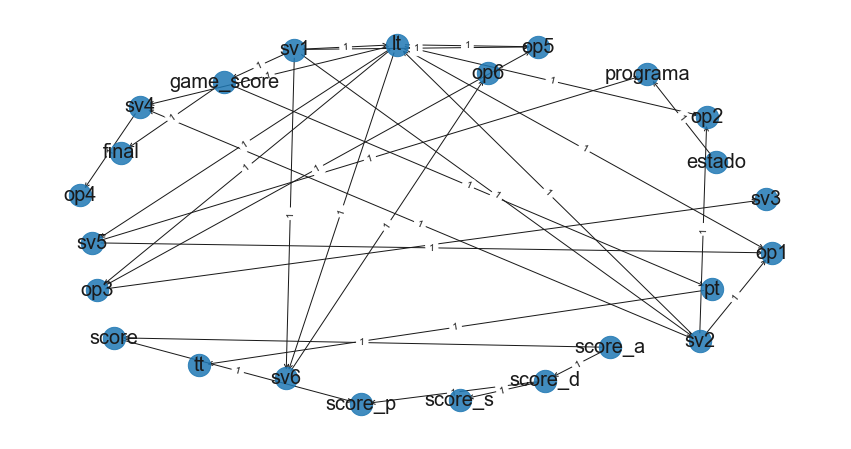

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+---------------------+---------------------+---------------------+
| sv1     | sv1(0)              | sv1(0)              | sv1(1)              | sv1(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| sv2     | sv2(0)              | sv2(1)              | sv2(0)              | sv2(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(0.0) | 0.19607843137254902 | 0.1968503937007874  | 0.18796992481203006 | 0.4498327759197324  |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(1.0) | 0.19607843137254902 | 0.20866141732283464 | 0.21804511278195488 | 0.23244147157190637 |
+---------+---------------------+---------------------+-------------------

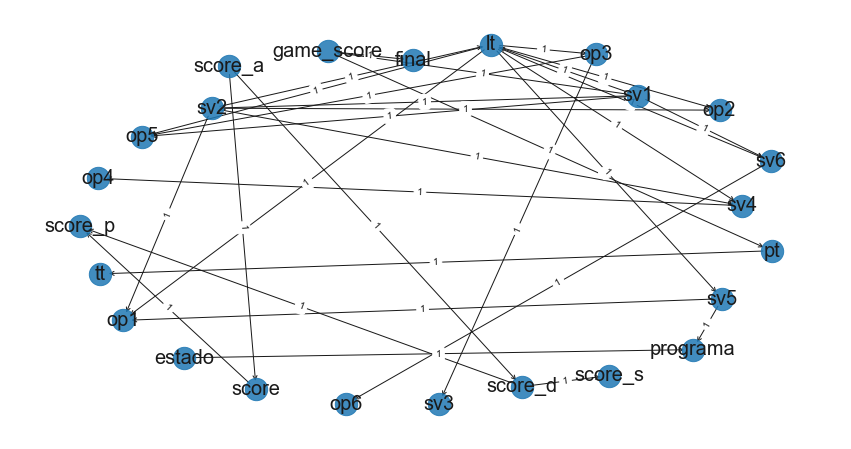

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

FILA N°: 0 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |       




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5791 |
+-----------+---------------+
| estado(1) |        0.4209 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "fina


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":5, "final


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "fina

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5791 |
+-----------+---------------+
| estado(1) |        0.4209 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5791 |
+-----------+---------------+
| estado(1) |        0.4209 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4, "final

Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":4.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "fina

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5933 |
+-----------+---------------+
| estado(1) |        0.4067 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fin












0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin












0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:10, ?it/s][A
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":3.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5887 |
+-----------+---------------+
| estado(1) |        0.4113 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "fi

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fi














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..


0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2, "fin















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 172 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "fi

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "fi














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 183 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "fin

0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]












Finding Elimination Order: : : 0it [01:20, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3, "fin

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [01:00, ?it/s][A
Finding Elimination Order: : : 0it [01:10, ?it/s]















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin

0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:50, ?it/s][A



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4, "fin

 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [01:00, ?it/s][A



















Finding Elimination Order: : : 0it [01:40, ?it/s][A
0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4, "fin

0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















Finding Elimination Order: : : 0it [00:50, ?it/s]





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "fin

 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:50, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "fin

0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5933 |
+-----------+---------------+
| estado(1) |        0.4067 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin

0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fi

0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "fin





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















Finding Elimination Order: : : 0it [00:50, ?it/s]





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4, "fi

 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:50, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3, "fin

0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A



















Finding Elimination Order: : : 0it [01:20, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "programa":5, "fin

0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "fin




















 ... (more hidden) ...




















Finding Elimination Order: : : 0it [1:02:39, ?it/s]A
Finding Elimination Order: : : 0it [1:01:59, ?it/s]
Finding Elimination Order: : : 0it [1:00:18, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [58:37, ?it/s]
Finding Elimination Order: : : 0it [56:46, ?it/s]
Finding Elimination Order: : : 0it [53:15, ?it/s]
Finding Elimination Order: : : 0it [52:45, ?it/s]

Finding Elimination Order: : : 0it [51:24, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [50:43, ?it/s]

Finding Elimination Order: : : 0it [50:03, ?it/s]

Finding Elimination Order: : : 0it [49:02, ?it/s]



Finding Elimination Order: : : 0it [46:51, ?it/s]
Finding Elimination Order: : : 0it [44:40, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [42:59, ?it/s]
Finding Elimination Order: : : 0it [41:19, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [40:28, ?it/s]
Finding Elimination Order: : : 0it [37:37, ?

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "fin

0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fi






0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [01:00, ?it/s]

Finding Elimination Order: : : 0it [01:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5791 |
+-----------+---------------+
| estado(1) |        0.4209 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "fin


0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin


0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "fin













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:50, ?it/s]

Finding Elimination Order: : : 0it [01:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "fin

0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "fin

0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "f


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:50, ?it/s]

Finding Elimination Order: : : 0it [01:30, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "fi



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":4, "fin

0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":2, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fin

0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi












0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":5, "fin

0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...



















Finding Elimination Order: : : 0it [01:30, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi

0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fin




















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...





































Finding Elimination Order: : : 0it [01:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1, "final":0.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5887 |
+-----------+---------------+
| estado(1) |        0.4113 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6100 |
+-----------+---------------+
| estado(1) |        0.3900 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5791 |
+-----------+---------------+
| estado(1) |        0.4209 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6333 |
+-----------+---------------+
| estado(1) |        0.3667 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "fi




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4892 |
+-----------+---------------+
| estado(1) |        0.5108 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5791 |
+-----------+---------------+
| estado(1) |        0.4209 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:40, ?it/s][A


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





















0it [00:00, ?it/s]    


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7168 |
+-----------+---------------+
| estado(1) |        0.2832 |
+-----------+---------------+
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  1
INICIO DE SECCION DE PRUEBAS, FOLD:  1
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


Finding Elimination Order: : : 0it [1:01:06, ?it/s]
Finding Elimination Order: : : 0it [44:45, ?it/s]
Finding Elimination Order: : : 0it [44:04, ?it/s]
Finding Elimination Order: : : 0it [43:14, ?it/s]
Finding Elimination Order: : : 0it [41:54, ?it/s]
Finding Elimination Order: : : 0it [40:33, ?it/s]
Finding Elimination Order: : : 0it [39:43, ?it/s]
Finding Elimination Order: : : 0it [38:53, ?it/s]
Finding Elimination Order: : : 0it [38:02, ?it/s]
Finding Elimination Order: : : 0it [37:12, ?it/s]
Finding Elimination Order: : : 0it [36:32, ?it/s]
Finding Elimination Order: : : 0it [34:41, ?it/s]
Finding Elimination Order: : : 0it [33:11, ?it/s]
Finding Elimination Order: : : 0it [31:50, ?it/s]
Finding Elimination Order: : : 0it [30:00, ?it/s]
Finding Elimination Order: : : 0it [28:29, ?it/s]
Finding Elimination Order: : : 0it [27:09, ?it/s]
Finding Elimination Order: : : 0it [26:19, ?it/s]
Finding Elimination Order: : : 0it [24:58, ?it/s]
Finding Elimination Order: : : 0it [23:38, ?it/s

[bnlearn] >Plot based on BayesianModel


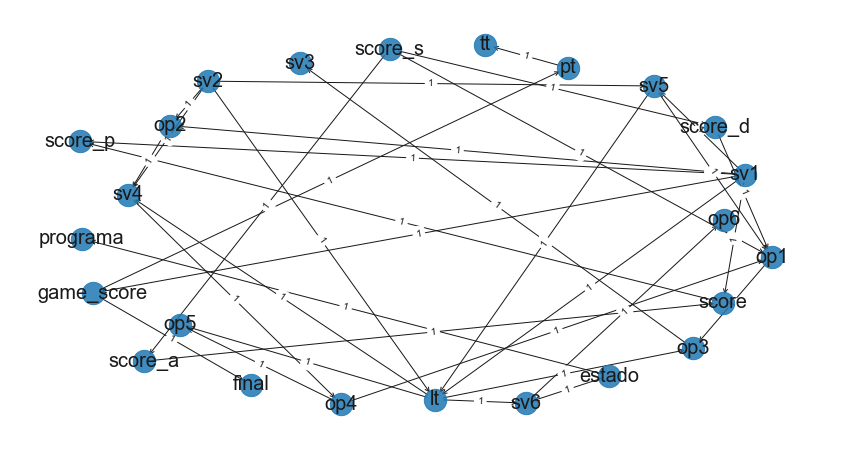

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+--------+--------+---------------------+--------+-------------+-------------+---------------------+---------------------+
| sv1     | sv1(0) | sv1(0) | sv1(0)              | sv1(0) | sv1(1)      | sv1(1)      | sv1(1)              | sv1(1)              |
+---------+--------+--------+---------------------+--------+-------------+-------------+---------------------+---------------------+
| sv2     | sv2(0) | sv2(0) | sv2(1)              | sv2(1) | sv2(0)      | sv2(0)      | sv2(1)              | sv2(1)              |
+---------+--------+--------+---------------------+--------+-------------+-------------+---------------------+---------------------+
| sv5     | sv5(0) | sv5(1) | sv5(0)              | sv5(1) | sv5(0)      | sv5(1)      | sv5(0)              | sv5(1)              |
+---------+--------+--------+---------------------+--------+-------------+--

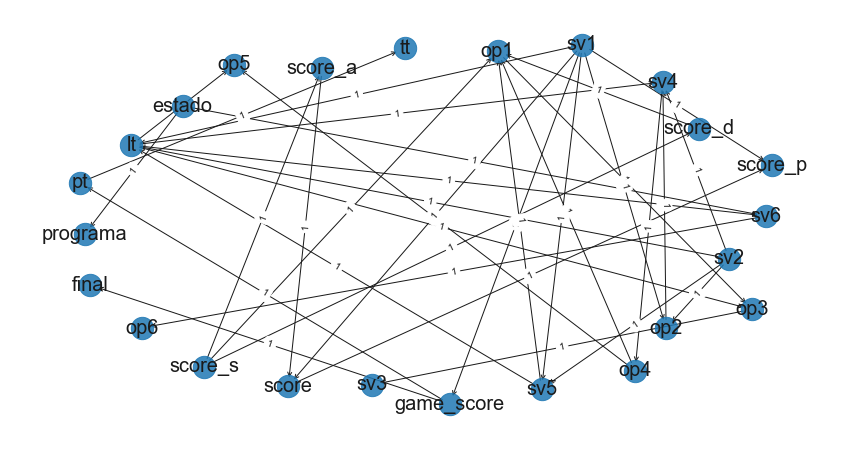

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]




FILA N°: 4 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |       

0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fina

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final


0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4924 |
+-----------+---------------+
| estado(1) |        0.5076 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5487 |
+-----------+---------------+
| estado(1) |        0.4513 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5678 |
+-----------+---------------+
| estado(1) |        0.4322 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":7, "score_p":1, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":2, "fi

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]








+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "fin

0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5, "fin








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "fin









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]










+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5517 |
+-----------+---------------+
| estado(1) |        0.4483 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5001 |
+-----------+---------------+
| estado(1) |        0.4999 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":1, "score_s":1, "programa":5, "fin

0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5001 |
+-----------+---------------+
| estado(1) |        0.4999 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "fin









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5678 |
+-----------+---------------+
| estado(1) |        0.4322 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5497 |
+-----------+---------------+
| estado(1) |        0.4503 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5458 |
+-----------+---------------+
| estado(1) |        0.4542 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fin









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi











0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":3, "fin












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]













+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5001 |
+-----------+---------------+
| estado(1) |        0.4999 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2, "fi

0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5748 |
+-----------+---------------+
| estado(1) |        0.4252 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]













+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5613 |
+-----------+---------------+
| estado(1) |        0.4387 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fin

0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5328 |
+-----------+---------------+
| estado(1) |        0.4672 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fin













0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5613 |
+-----------+---------------+
| estado(1) |        0.4387 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fin

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "fin













0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "fi














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5497 |
+-----------+---------------+
| estado(1) |        0.4503 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5306 |
+-----------+---------------+
| estado(1) |        0.4694 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5517 |
+-----------+---------------+
| estado(1) |        0.4483 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5613 |
+-----------+---------------+
| estado(1) |        0.4387 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "f

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "fin















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]

















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5748 |
+-----------+---------------+
| estado(1) |        0.4252 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fi

0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4823 |
+-----------+---------------+
| estado(1) |        0.5177 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5613 |
+-----------+---------------+
| estado(1) |        0.4387 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "fi

0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [01:30, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FIN DE SECCION DE PRUEBAS, FOLD:  1
largo de train:  373
(TRAIN) Fold 1 Precisión            : 0.8659517426273459
(TRAIN) Fold 1 Precisión balanceada : 0.5832919254658385
(TRAIN) Fold 1 Class Ratio          : 0.10455764075067024
largo de test :  94
(TEST) Fold 1 Precisión            : 0.8829787234042553
(TEST) Fold 1 Precisión balanceada : 0.6172161172161172
(TEST) Fold 1 Class Ratio          : 0.10638297872340426
INICIO DE SECCION DE ENTRENAMIENTO, FOLD:  2
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


Finding Elimination Order: : : 0it [27:22, ?it/s]
Finding Elimination Order: : : 0it [26:12, ?it/s]
Finding Elimination Order: : : 0it [24:01, ?it/s]
Finding Elimination Order: : : 0it [22:10, ?it/s]
Finding Elimination Order: : : 0it [20:00, ?it/s]
Finding Elimination Order: : : 0it [17:59, ?it/s]
Finding Elimination Order: : : 0it [16:18, ?it/s]
Finding Elimination Order: : : 0it [13:48, ?it/s]
Finding Elimination Order: : : 0it [11:37, ?it/s]
Finding Elimination Order: : : 0it [09:26, ?it/s]
Finding Elimination Order: : : 0it [07:16, ?it/s]
Finding Elimination Order: : : 0it [05:05, ?it/s]
Finding Elimination Order: : : 0it [02:54, ?it/s]
Finding Elimination Order: : : 0it [01:13, ?it/s]


[bnlearn] >Plot based on BayesianModel


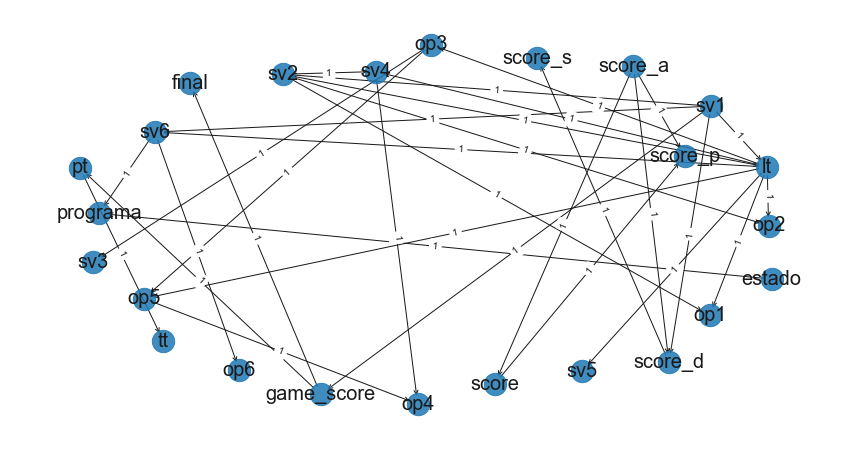

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+--------------------+---------------------+---------------------+
| sv1     | sv1(0)              | sv1(0)             | sv1(1)              | sv1(1)              |
+---------+---------------------+--------------------+---------------------+---------------------+
| sv2     | sv2(0)              | sv2(1)             | sv2(0)              | sv2(1)              |
+---------+---------------------+--------------------+---------------------+---------------------+
| lt(0.0) | 0.1968503937007874  | 0.1968503937007874 | 0.19101123595505617 | 0.46153846153846156 |
+---------+---------------------+--------------------+---------------------+---------------------+
| lt(1.0) | 0.1968503937007874  | 0.2047244094488189 | 0.20599250936329588 | 0.22742474916387959 |
+---------+---------------------+--------------------+---------------------+------

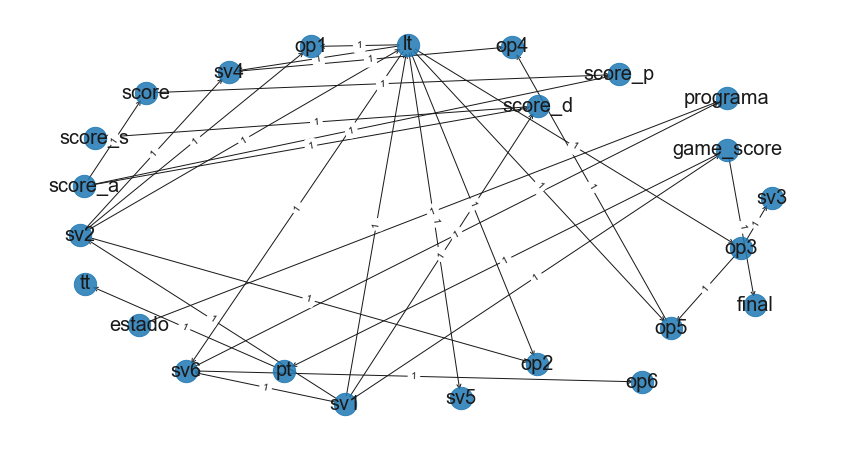

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

FILA N°: 0 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |       



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5, "final":

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 25 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "fina

0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5739 |
+-----------+---------------+
| estado(1) |        0.4261 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final

0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [01:00, ?it/s]











+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final










0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [09:15, ?it/s]
Finding Elimination Order: : : 0it [07:44, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":4.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "fina


Finding Elimination Order: : : 0it [06:03, ?it/s]
Finding Elimination Order: : : 0it [05:23, ?it/s]
Finding Elimination Order: : : 0it [04:42, ?it/s]
Finding Elimination Order: : : 0it [03:42, ?it/s]
Finding Elimination Order: : : 0it [02:51, ?it/s]
Finding Elimination Order: : : 0it [02:11, ?it/s]
Finding Elimination Order: : : 0it [01:31, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa":5, "fina



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fina


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]









+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":3.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin

0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:50, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":0, "sv6":1, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5, "fin












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5739 |
+-----------+---------------+
| estado(1) |        0.4261 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "fin

0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "programa":4, "fin

















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "f

Finding Elimination Order: : : 0it [00:10, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [16:49, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [15:38, ?it/s]
Finding Elimination Order: : : 0it [14:38, ?it/s]
Finding Elimination Order: : : 0it [13:47, ?it/s]
Finding Elimination Order: : : 0it [13:16, ?it/s]

Finding Elimination Order: : : 0it [12:56, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [12:35, ?it/s]
Finding Elimination Order: : : 0it [11:45, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [12:14, ?it/s]
Finding Elimination Order: : : 0it [11:33, ?it/s]


Finding Elimination Order: : : 0it [11:23, ?it/s]
Finding Elimination Order: : : 0it [10:53, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [10:32, ?it/s]
Finding Elimination Order: : : 0it [10:02, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [10:22, ?it/s]
Finding Elimination Order: : : 0it [08:51, ?it/s]



Finding Elimination Order: : : 0it [07:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order:

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 214 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 220 -> P("Estado" | [{"lt":3.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 226 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 251 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5739 |
+-----------+---------------+
| estado(1) |        0.4261 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "f


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 290 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 295 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"lt":3.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "programa":3, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5739 |
+-----------+---------------+
| estado(1) |        0.4261 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5739 |
+-----------+---------------+
| estado(1) |        0.4261 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fi


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5553 |
+-----------+---------------+
| estado(1) |        0.4447 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "f


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4911 |
+-----------+---------------+
| estado(1) |        0.5089 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi


Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6564 |
+-----------+---------------+
| estado(1) |        0.3436 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6702 |
+-----------+---------------+
| estado(1) |        0.3298 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7070 |
+-----------+---------------+
| estado(1) |        0.2930 |
+-----------+---------------+
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  2
INICIO DE SECCION DE PRUEBAS, FOLD:  2
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel



Finding Elimination Order: : : 0it [00:20, ?it/s]


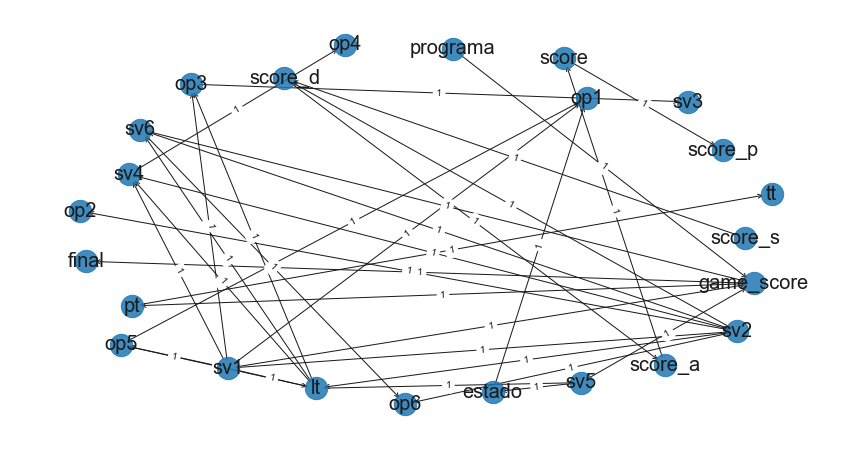

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+---------------------+---------------------+---------------------+
| sv1     | sv1(0)              | sv1(0)              | sv1(1)              | sv1(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| sv2     | sv2(0)              | sv2(1)              | sv2(0)              | sv2(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(0.0) | 0.24900398406374502 | 0.24900398406374502 | 0.24509803921568626 | 0.3367952522255193  |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(1.0) | 0.24900398406374502 | 0.25298804780876494 | 0.2607843137254902  | 0.2596439169139466  |
+---------+---------------------+---------------------+-------------------

Finding Elimination Order: : : 0it [57:36, ?it/s]


+------------+------------+---------------------+------------+---------------------+---------------------+---------------------+---------------------+---------------------+------------+---------------------+
| score_s    | score_s(0) | score_s(0)          | score_s(1) | score_s(1)          | score_s(2)          | score_s(2)          | score_s(3)          | score_s(3)          | score_s(4) | score_s(4)          |
+------------+------------+---------------------+------------+---------------------+---------------------+---------------------+---------------------+---------------------+------------+---------------------+
| sv2        | sv2(0)     | sv2(1)              | sv2(0)     | sv2(1)              | sv2(0)              | sv2(1)              | sv2(0)              | sv2(1)              | sv2(0)     | sv2(1)              |
+------------+------------+---------------------+------------+---------------------+---------------------+---------------------+---------------------+------------------

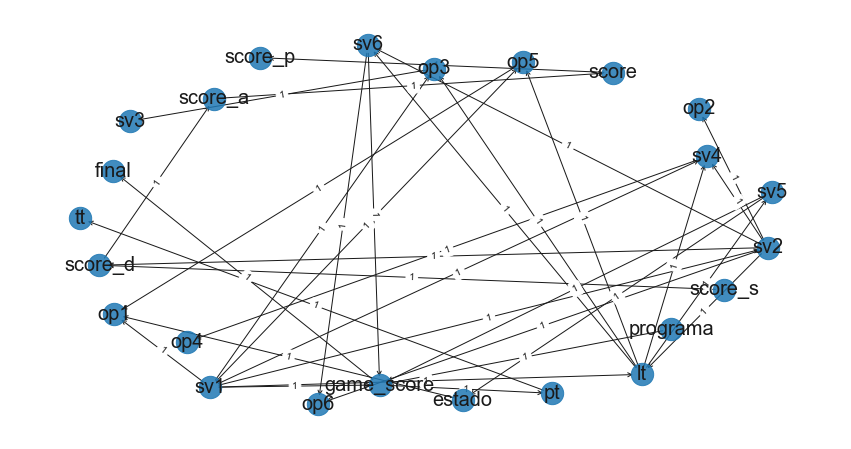

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]




FILA N°: 14 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |     

0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:20, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5092 |
+-----------+---------------+
| estado(1) |        0.4908 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5092 |
+-----------+---------------+
| estado(1) |        0.4908 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 116 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5590 |
+-----------+---------------+
| estado(1) |        0.4410 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3, "fi






0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 183 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2, "fin

Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "fi







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2, "fin

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5097 |
+-----------+---------------+
| estado(1) |        0.4903 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5092 |
+-----------+---------------+
| estado(1) |        0.4908 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fi

Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5092 |
+-----------+---------------+
| estado(1) |        0.4908 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fi

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5092 |
+-----------+---------------+
| estado(1) |        0.4908 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi

Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "fin


Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FIN DE SECCION DE PRUEBAS, FOLD:  2
largo de train:  373
(TRAIN) Fold 2 Precisión            : 0.8766756032171582
(TRAIN) Fold 2 Precisión balanceada : 0.6212121212121212
(TRAIN) Fold 2 Class Ratio          : 0.10455764075067024
largo de test :  94
(TEST) Fold 2 Prec

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


[bnlearn] >Plot based on BayesianModel


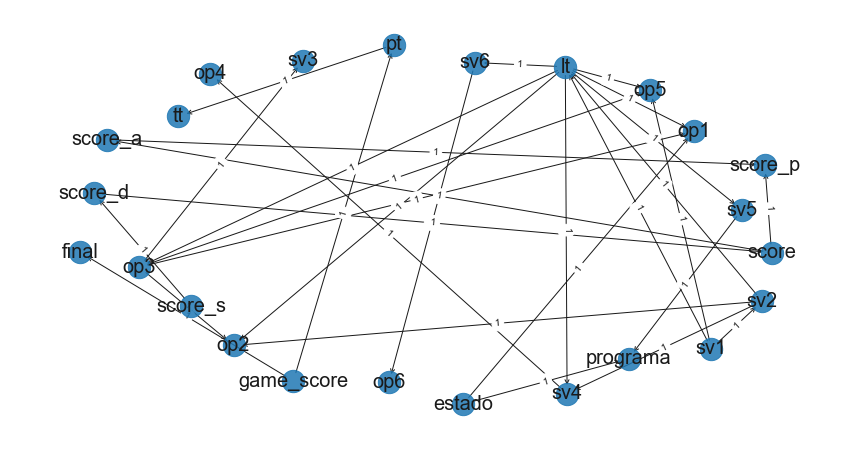

Finding Elimination Order: : : 0it [29:33, ?it/s]
Finding Elimination Order: : : 0it [27:43, ?it/s]
Finding Elimination Order: : : 0it [22:02, ?it/s]
Finding Elimination Order: : : 0it [13:49, ?it/s]

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.


CPD of lt:
+---------+---------------------+---------------------+---------------------+---------------------+
| sv1     | sv1(0)              | sv1(0)              | sv1(1)              | sv1(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| sv2     | sv2(0)              | sv2(1)              | sv2(0)              | sv2(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(0.0) | 0.1976284584980237  | 0.1968503937007874  | 0.19101123595505617 | 0.4533333333333333  |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(1.0) | 0.1976284584980237  | 0.20866141732283464 | 0.21348314606741572 | 0.23166666666666666 |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(2.0) | 0.2015810276679842  | 0.20078740157480315 | 0.21348314606741572 | 0.14       

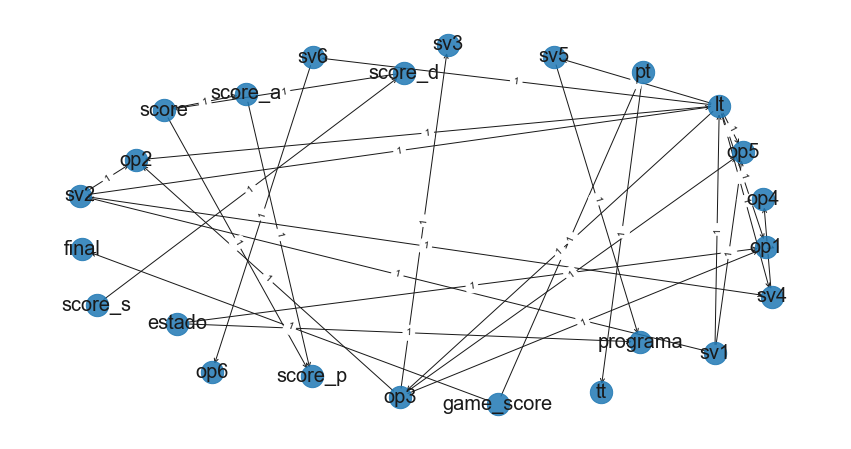

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5113 |
+-----------+---------------+
| estado(1) |       



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5549 |
+-----------+---------------+
| estado(1) |        0.4451 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5113 |
+-----------+---------------+
| estado(1) |        0.4887 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4651 |
+-----------+---------------+
| estado(1) |        0.5349 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6646 |
+-----------+---------------+
| estado(1) |        0.3354 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5588 |
+-----------+---------------+
| estado(1) |        0.4412 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5787 |
+-----------+---------------+
| estado(1) |        0.4213 |
+-----------+---------------+
FILA N°: 25 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5666 |
+-----------+---------------+
| estado(1) |        0.4334 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "fina







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6209 |
+-----------+---------------+
| estado(1) |        0.3791 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6112 |
+-----------+---------------+
| estado(1) |        0.3888 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5975 |
+-----------+---------------+
| estado(1) |        0.4025 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5519 |
+-----------+---------------+
| estado(1) |        0.4481 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6180 |
+-----------+---------------+
| estado(1) |        0.3820 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6222 |
+-----------+---------------+
| estado(1) |        0.3778 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7360 |
+-----------+---------------+
| estado(1) |        0.2640 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5794 |
+-----------+---------------+
| estado(1) |        0.4206 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":4.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6543 |
+-----------+---------------+
| estado(1) |        0.3457 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "fina

0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7360 |
+-----------+---------------+
| estado(1) |        0.2640 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6611 |
+-----------+---------------+
| estado(1) |        0.3389 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final










0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6474 |
+-----------+---------------+
| estado(1) |        0.3526 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6542 |
+-----------+---------------+
| estado(1) |        0.3458 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final











0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final

0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6703 |
+-----------+---------------+
| estado(1) |        0.3297 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final












0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5660 |
+-----------+---------------+
| estado(1) |        0.4340 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final

0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final













0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fina













0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7614 |
+-----------+---------------+
| estado(1) |        0.2386 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":5, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"lt":3.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7328 |
+-----------+---------------+
| estado(1) |        0.2672 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "fin















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6542 |
+-----------+---------------+
| estado(1) |        0.3458 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4, "fin















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7328 |
+-----------+---------------+
| estado(1) |        0.2672 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa":1, "fin
















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5787 |
+-----------+---------------+
| estado(1) |        0.4213 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "fin

0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6950 |
+-----------+---------------+
| estado(1) |        0.3050 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "fin

















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6222 |
+-----------+---------------+
| estado(1) |        0.3778 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6542 |
+-----------+---------------+
| estado(1) |        0.3458 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "fi

















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "fin

















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7006 |
+-----------+---------------+
| estado(1) |        0.2994 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "fi


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:20, ?it/s]



FILA N°: 146 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":7, "score_p":1, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6906 |
+-----------+---------------+
| estado(1) |  

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4658 |
+-----------+---------------+
| estado(1) |        0.5342 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6646 |
+-----------+---------------+
| estado(1) |        0.3354 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "fi


















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [16:00, ?it/s]
Finding Elimination Order: : : 0it [14:19, ?it/s]
Finding Elimination Order: : : 0it [13:39, ?it/s]
Finding Elimination Order: : : 0it [12:28, ?it/s]
Finding Elimination Order: : : 0it [11:17, ?it/s]
Finding Elimination Order: : : 0it [10:26, ?it/s]
Finding Elimination Order: : : 0it [09:46, ?it/s]
Finding Elimination Order: : : 0it [08:15, ?it/s]
Finding Elimination Order: : : 0it [07:35, ?it/s]
Finding Elimination Order: : : 0it [06:44, ?it/s]
Finding Elimination Order: : : 0it [05:44, ?it/s]
Finding Elimination Order: : : 0it [04:33, ?it/s]
Finding Elimination Order: : : 0it [03:22, ?it/s]
Finding Elimination Order: : : 0it [02:02, ?it/s]
Finding Elimination Order: : : 0it [01:21, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7360 |
+-----------+---------------+
| estado(1) |        0.2640 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5549 |
+-----------+---------------+
| estado(1) |        0.4451 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":5, "fi

Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6553 |
+-----------+---------------+
| estado(1) |        0.3447 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4, "fin



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7360 |
+-----------+---------------+
| estado(1) |        0.2640 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "fin




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5113 |
+-----------+---------------+
| estado(1) |        0.4887 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5177 |
+-----------+---------------+
| estado(1) |        0.4823 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3, "fin




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7360 |
+-----------+---------------+
| estado(1) |        0.2640 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "fi




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3, "fi




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5787 |
+-----------+---------------+
| estado(1) |        0.4213 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7614 |
+-----------+---------------+
| estado(1) |        0.2386 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "fi




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 183 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5660 |
+-----------+---------------+
| estado(1) |        0.4340 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6611 |
+-----------+---------------+
| estado(1) |        0.3389 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "programa":4, "fin





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5666 |
+-----------+---------------+
| estado(1) |        0.4334 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5113 |
+-----------+---------------+
| estado(1) |        0.4887 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6703 |
+-----------+---------------+
| estado(1) |        0.3297 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7360 |
+-----------+---------------+
| estado(1) |        0.2640 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3, "fi







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7360 |
+-----------+---------------+
| estado(1) |        0.2640 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "programa":4, "fin







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6137 |
+-----------+---------------+
| estado(1) |        0.3863 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":1, "score_s":1, "programa":5, "fin








Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5588 |
+-----------+---------------+
| estado(1) |        0.4412 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "programa":3, "fi









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]









+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7006 |
+-----------+---------------+
| estado(1) |        0.2994 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin

0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5794 |
+-----------+---------------+
| estado(1) |        0.4206 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2, "fin








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5787 |
+-----------+---------------+
| estado(1) |        0.4213 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6553 |
+-----------+---------------+
| estado(1) |        0.3447 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2, "fin








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6574 |
+-----------+---------------+
| estado(1) |        0.3426 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "f








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 226 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4, "fin








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 231 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5794 |
+-----------+---------------+
| estado(1) |        0.4206 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7400 |
+-----------+---------------+
| estado(1) |        0.2600 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "fi









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6257 |
+-----------+---------------+
| estado(1) |        0.3743 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":0, "programa":4, "fin









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6553 |
+-----------+---------------+
| estado(1) |        0.3447 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5177 |
+-----------+---------------+
| estado(1) |        0.4823 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "fin

0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6229 |
+-----------+---------------+
| estado(1) |        0.3771 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7614 |
+-----------+---------------+
| estado(1) |        0.2386 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "fin










0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6506 |
+-----------+---------------+
| estado(1) |        0.3494 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7006 |
+-----------+---------------+
| estado(1) |        0.2994 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6703 |
+-----------+---------------+
| estado(1) |        0.3297 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2, "fin












0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6532 |
+-----------+---------------+
| estado(1) |        0.3468 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7614 |
+-----------+---------------+
| estado(1) |        0.2386 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin













0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5787 |
+-----------+---------------+
| estado(1) |        0.4213 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6209 |
+-----------+---------------+
| estado(1) |        0.3791 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "fin















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]



[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7360 |
+-----------+---------------+
| estado(1) |        0.2640 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6222 |
+-----------+---------------+
| estado(1) |        0.3778 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6553 |
+-----------+---------------+
| estado(1) |        0.3447 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "fin
















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5666 |
+-----------+---------------+
| estado(1) |        0.4334 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5113 |
+-----------+---------------+
| estado(1) |        0.4887 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fin

















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "fin

















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6611 |
+-----------+---------------+
| estado(1) |        0.3389 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi


















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6222 |
+-----------+---------------+
| estado(1) |        0.3778 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6950 |
+-----------+---------------+
| estado(1) |        0.3050 |
+-----------+---------------+
FILA N°: 298 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [15:21, ?it/s]
Finding Elimination Order: : : 0it [14:40, ?it/s]
Finding Elimination Order: : : 0it [13:59, ?it/s]
Finding Elimination Order: : : 0it [13:18, ?it/s]
Finding Elimination Order: : : 0it [12:28, ?it/s]
Finding Elimination Order: : : 0it [11:17, ?it/s]
Finding Elimination Order: : : 0it [10:05, ?it/s]
Finding Elimination Order: : : 0it [08:54, ?it/s]
Finding Elimination Order: : : 0it [08:14, ?it/s]
Finding Elimination Order: : : 0it [07:13, ?it/s]
Finding Elimination Order: : : 0it [06:33, ?it/s]
Finding Elimination Order: : : 0it [05:52, ?it/s]
Finding Elimination Order: : : 0it [05:12, ?it/s]
Finding Elimination Order: : : 0it [03:41, ?it/s]
Finding Elimination Order: : : 0it [03:01, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7400 |
+-----------+---------------+
| estado(1) |        0.2600 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fi


Finding Elimination Order: : : 0it [01:30, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6222 |
+-----------+---------------+
| estado(1) |        0.3778 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6841 |
+-----------+---------------+
| estado(1) |        0.3159 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6611 |
+-----------+---------------+
| estado(1) |        0.3389 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6222 |
+-----------+---------------+
| estado(1) |        0.3778 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2, "fi



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6611 |
+-----------+---------------+
| estado(1) |        0.3389 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6542 |
+-----------+---------------+
| estado(1) |        0.3458 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


FILA N°: 327 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6229 |
+-----------+---------------+
| estado(1) |  


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5794 |
+-----------+---------------+
| estado(1) |        0.4206 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"lt":3.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6506 |
+-----------+---------------+
| estado(1) |        0.3494 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5, "fin






0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fin

0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7400 |
+-----------+---------------+
| estado(1) |        0.2600 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fi







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "fin








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4, "fin








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5177 |
+-----------+---------------+
| estado(1) |        0.4823 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "f








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5216 |
+-----------+---------------+
| estado(1) |        0.4784 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6589 |
+-----------+---------------+
| estado(1) |        0.3411 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "fi








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7006 |
+-----------+---------------+
| estado(1) |        0.2994 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6703 |
+-----------+---------------+
| estado(1) |        0.3297 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "fin









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6542 |
+-----------+---------------+
| estado(1) |        0.3458 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fi










0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5794 |
+-----------+---------------+
| estado(1) |        0.4206 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin










0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "fin










0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]












+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5666 |
+-----------+---------------+
| estado(1) |        0.4334 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6467 |
+-----------+---------------+
| estado(1) |        0.3533 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fi

0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6229 |
+-----------+---------------+
| estado(1) |        0.3771 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6657 |
+-----------+---------------+
| estado(1) |        0.3343 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "fin











0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6981 |
+-----------+---------------+
| estado(1) |        0.3019 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3, "fin













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]














+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7400 |
+-----------+---------------+
| estado(1) |        0.2600 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5, "fin

0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6161 |
+-----------+---------------+
| estado(1) |        0.3839 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "fin













0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6257 |
+-----------+---------------+
| estado(1) |        0.3743 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5787 |
+-----------+---------------+
| estado(1) |        0.4213 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5666 |
+-----------+---------------+
| estado(1) |        0.4334 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6174 |
+-----------+---------------+
| estado(1) |        0.3826 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "f

0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5588 |
+-----------+---------------+
| estado(1) |        0.4412 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "f

0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6703 |
+-----------+---------------+
| estado(1) |        0.3297 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6108 |
+-----------+---------------+
| estado(1) |        0.3892 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5684 |
+-----------+---------------+
| estado(1) |        0.4316 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6553 |
+-----------+---------------+
| estado(1) |        0.3447 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fi














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6646 |
+-----------+---------------+
| estado(1) |        0.3354 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5666 |
+-----------+---------------+
| estado(1) |        0.4334 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6222 |
+-----------+---------------+
| estado(1) |        0.3778 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fi















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6180 |
+-----------+---------------+
| estado(1) |        0.3820 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6222 |
+-----------+---------------+
| estado(1) |        0.3778 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "fin















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7006 |
+-----------+---------------+
| estado(1) |        0.2994 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7400 |
+-----------+---------------+
| estado(1) |        0.2600 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "fin
















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]

















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7400 |
+-----------+---------------+
| estado(1) |        0.2600 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7058 |
+-----------+---------------+
| estado(1) |        0.2942 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "fi

0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6667 |
+-----------+---------------+
| estado(1) |        0.3333 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7705 |
+-----------+---------------+
| estado(1) |        0.2295 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6646 |
+-----------+---------------+
| estado(1) |        0.3354 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6025 |
+-----------+---------------+
| estado(1) |        0.3975 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "fin

















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6950 |
+-----------+---------------+
| estado(1) |        0.3050 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7006 |
+-----------+---------------+
| estado(1) |        0.2994 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "f

Finding Elimination Order: : : 0it [00:03, ?it/s]
Finding Elimination Order: : : 0it [16:04, ?it/s]
Finding Elimination Order: : : 0it [14:04, ?it/s]
Finding Elimination Order: : : 0it [13:24, ?it/s]
Finding Elimination Order: : : 0it [13:03, ?it/s]
Finding Elimination Order: : : 0it [11:42, ?it/s]
Finding Elimination Order: : : 0it [11:02, ?it/s]
Finding Elimination Order: : : 0it [10:11, ?it/s]
Finding Elimination Order: : : 0it [09:30, ?it/s]
Finding Elimination Order: : : 0it [08:09, ?it/s]
Finding Elimination Order: : : 0it [06:39, ?it/s]
Finding Elimination Order: : : 0it [05:59, ?it/s]
Finding Elimination Order: : : 0it [04:57, ?it/s]
Finding Elimination Order: : : 0it [03:56, ?it/s]
Finding Elimination Order: : : 0it [02:45, ?it/s]
Finding Elimination Order: : : 0it [01:14, ?it/s]
Finding Elimination Order: : : 0it [00:34, ?it/s]


[bnlearn] >Plot based on BayesianModel


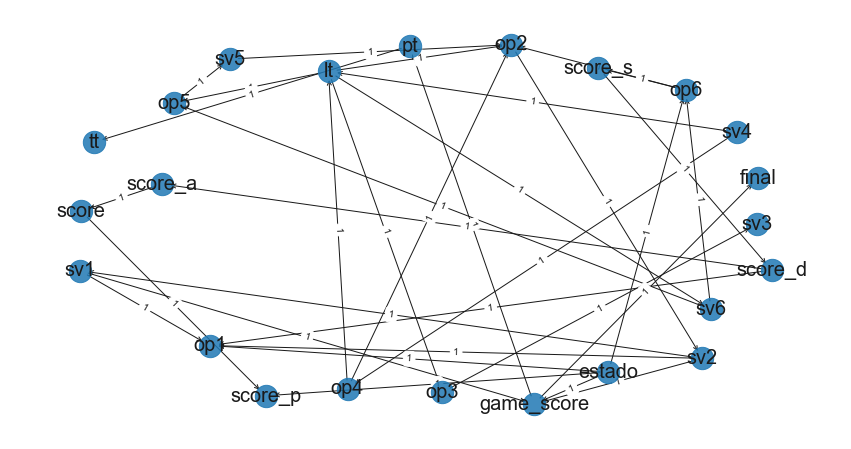

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+---------------------+--------------------+---------------------+
| op4     | op4(0)              | op4(0)              | op4(1)             | op4(1)              |
+---------+---------------------+---------------------+--------------------+---------------------+
| sv4     | sv4(0)              | sv4(1)              | sv4(0)             | sv4(1)              |
+---------+---------------------+---------------------+--------------------+---------------------+
| lt(0.0) | 0.3213429256594724  | 0.3469640644361834  | 0.3333333333333333 | 0.4132882882882883  |
+---------+---------------------+---------------------+--------------------+---------------------+
| lt(1.0) | 0.35371702637889685 | 0.3246592317224287  | 0.3333333333333333 | 0.29842342342342343 |
+---------+---------------------+---------------------+--------------------+------

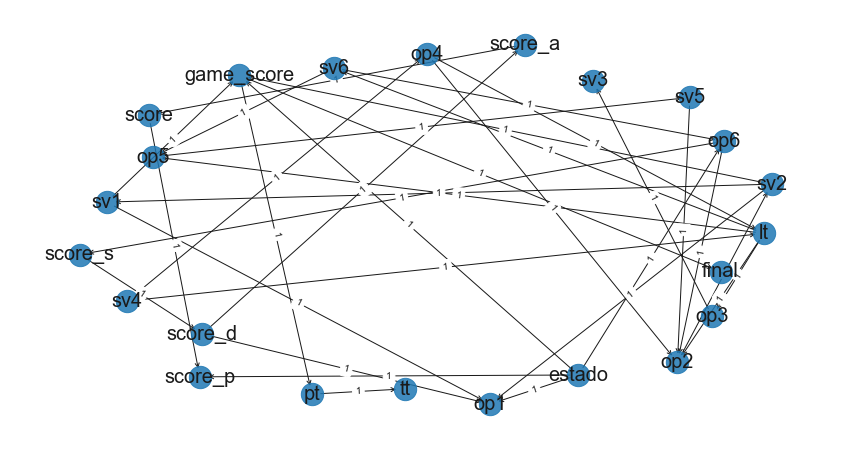

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

COLUMNA ELIMINADA DE LA INFERENCIA:  programa
FILA N°: 0 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4721 |
+-----------+---------------+
| estado(1) |        0.5279 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3489 |
+-----------+---------------+
| estado(1) |        0.6511 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "final":0.0}]
[bnlearn] >Variable E

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6172 |
+-----------+---------------+
| estado(1) |        0.3828 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4569 |
+-----------+---------------+
| estado(1) |        0.5431 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable 

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3537 |
+-----------+---------------+
| estado(1) |        0.6463 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4412 |
+-----------+---------------+
| estado(1) |        0.5588 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5623 |
+-----------+---------------+
| estado(1) |        0.4377 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4697 |
+-----------+---------------+
| estado(1) |        0.5303 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3618 |
+-----------+---------------+
| estado(1) |        0.6382 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6131 |
+-----------+---------------+
| estado(1) |        0.3869 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable 

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6176 |
+-----------+---------------+
| estado(1) |        0.3824 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5403 |
+-----------+---------------+
| estado(1) |        0.4597 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6457 |
+-----------+---------------+
| estado(1) |        0.3543 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5641 |
+-----------+---------------+
| estado(1) |        0.4359 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "final":3.0}]
[bnlearn] >Variable 


Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]





+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6979 |
+-----------+---------------+
| estado(1) |        0.3021 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable 

0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6972 |
+-----------+---------------+
| estado(1) |        0.3028 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6877 |
+-----------+---------------+
| estado(1) |        0.3123 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5711 |
+-----------+---------------+
| estado(1) |        0.4289 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variab

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6593 |
+-----------+---------------+
| estado(1) |        0.3407 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5185 |
+-----------+---------------+
| estado(1) |        0.4815 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5265 |
+-----------+---------------+
| estado(1) |        0.4735 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5342 |
+-----------+---------------+
| estado(1) |        0.4658 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6444 |
+-----------+---------------+
| estado(1) |        0.3556 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5294 |
+-----------+---------------+
| estado(1) |        0.4706 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6028 |
+-----------+---------------+
| estado(1) |        0.3972 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6248 |
+-----------+---------------+
| estado(1) |        0.3752 |
+-----------+---------------+
FILA N°: 172 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variab

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7685 |
+-----------+---------------+
| estado(1) |        0.2315 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5927 |
+-----------+---------------+
| estado(1) |        0.4073 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6181 |
+-----------+---------------+
| estado(1) |        0.3819 |
+-----------+---------------+
FILA N°: 208 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5992 |
+-----------+---------------+
| estado(1) |        0.4008 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6665 |
+-----------+---------------+
| estado(1) |        0.3335 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variabl

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6549 |
+-----------+---------------+
| estado(1) |        0.3451 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5646 |
+-----------+---------------+
| estado(1) |        0.4354 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6355 |
+-----------+---------------+
| estado(1) |        0.3645 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7341 |
+-----------+---------------+
| estado(1) |        0.2659 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variab

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4870 |
+-----------+---------------+
| estado(1) |        0.5130 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6646 |
+-----------+---------------+
| estado(1) |        0.3354 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "final":2.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5985 |
+-----------+---------------+
| estado(1) |        0.4015 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6471 |
+-----------+---------------+
| estado(1) |        0.3529 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6527 |
+-----------+---------------+
| estado(1) |        0.3473 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4283 |
+-----------+---------------+
| estado(1) |        0.5717 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variab

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7316 |
+-----------+---------------+
| estado(1) |        0.2684 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6304 |
+-----------+---------------+
| estado(1) |        0.3696 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5278 |
+-----------+---------------+
| estado(1) |        0.4722 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4797 |
+-----------+---------------+
| estado(1) |        0.5203 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6457 |
+-----------+---------------+
| estado(1) |        0.3543 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6509 |
+-----------+---------------+
| estado(1) |        0.3491 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "final":3.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6099 |
+-----------+---------------+
| estado(1) |        0.3901 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6587 |
+-----------+---------------+
| estado(1) |        0.3413 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5927 |
+-----------+---------------+
| estado(1) |        0.4073 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5866 |
+-----------+---------------+
| estado(1) |        0.4134 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variab




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6442 |
+-----------+---------------+
| estado(1) |        0.3558 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6129 |
+-----------+---------------+
| estado(1) |        0.3871 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7326 |
+-----------+---------------+
| estado(1) |        0.2674 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5724 |
+-----------+---------------+
| estado(1) |        0.4276 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6515 |
+-----------+---------------+
| estado(1) |        0.3485 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6947 |
+-----------+---------------+
| estado(1) |        0.3053 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6479 |
+-----------+---------------+
| estado(1) |        0.3521 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6091 |
+-----------+---------------+
| estado(1) |        0.3909 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6646 |
+-----------+---------------+
| estado(1) |        0.3354 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variabl




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7685 |
+-----------+---------------+
| estado(1) |        0.2315 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7600 |
+-----------+---------------+
| estado(1) |        0.2400 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5439 |
+-----------+---------------+
| estado(1) |        0.4561 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variab

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7185 |
+-----------+---------------+
| estado(1) |        0.2815 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6855 |
+-----------+---------------+
| estado(1) |        0.3145 |
+-----------+---------------+
FIN DE SECCION DE PRUEBAS, FOLD:  3
largo de train:  374
(TRAIN) Fold 3 Precisión            : 0.893048128342246
(TRAIN) Fold 3 Precisión balanceada : 0.6498644986449864
(TRAIN) Fold 3 Class Ratio          : 0.10427807486631016
largo de test :  93
(TEST) Fold 3 Precisión           

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [28:21, ?it/s]


[bnlearn] >Plot based on BayesianModel


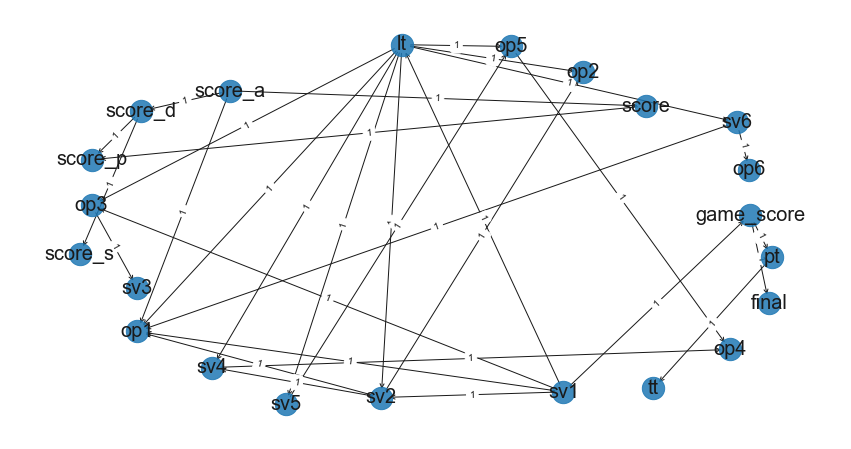

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+---------------------+
| sv1     | sv1(0)              | sv1(1)              |
+---------+---------------------+---------------------+
| lt(0.0) | 0.19723865877712032 | 0.370242214532872   |
+---------+---------------------+---------------------+
| lt(1.0) | 0.20118343195266272 | 0.22837370242214533 |
+---------+---------------------+---------------------+
| lt(2.0) | 0.20512820512820512 | 0.16724336793540945 |
+---------+---------------------+---------------------+
| lt(3.0) | 0.19723865877712032 | 0.11880046136101499 |
+---------+---------------------+---------------------+
| lt(4.0) | 0.1992110453648915  | 0.11534025374855825 |
+---------+---------------------+---------------------+
CPD of op1:
+---------+------------+------------+------------+------------+------------+------------+------------+--------------------+-----------

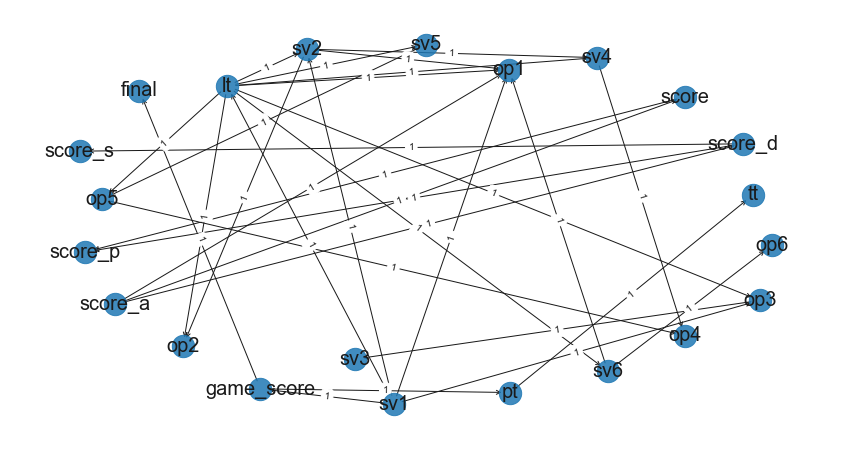

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

COLUMNA ELIMINADA DE LA INFERENCIA:  programa
FILA N°: 0 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 3 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 4 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 6 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 7 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 12 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 14 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 15 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 17 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 18 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 19 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 21 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 22 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 23 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 24 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 25 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 27 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 28 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 29 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 30 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 32 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:42, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 33 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 34 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 35 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 36 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 37 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 38 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 39 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 40 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 41 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 42 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 43 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 44 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 45 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 46 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 47 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 50 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 52 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 53 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 54 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 55 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 56 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 57 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 58 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 60 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 62 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":4.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 68 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 71 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 72 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 73 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 75 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 76 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 81 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 82 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 83 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 84 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 87 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 89 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 91 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 93 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 94 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 95 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 96 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3

Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 99 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 100 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 105 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 106 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [01:06, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 107 -> P("Estado" | [{"lt":3.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 108 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 109 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 110 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 112 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 115 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 116 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 118 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 119 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 120 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 122 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 123 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 125 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 126 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 127 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 129 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 130 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 131 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 132 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 135 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 137 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 138 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 139 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 140 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 141 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 142 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 143 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":0, "sv6":1, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 145 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 146 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 147 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":7, "score_p":1, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 148 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 149 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 153 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 155 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 156 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 157 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 158 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 159 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 160 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 161 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 162 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 163 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 164 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 165 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 167 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 168 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:06, ?it/s]
Finding Elimination Order: : : 0it [00:46, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 169 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 170 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 171 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 172 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 173 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 174 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 175 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 176 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, 


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 177 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 180 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 182 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 183 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 184 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 185 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 186 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 187 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 188 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 189 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 191 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "final":4.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 192 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 195 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 197 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 198 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 199 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 200 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 201 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 202 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 203 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 204 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 205 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 206 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 207 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "final":1.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 208 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 209 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "final":1.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 210 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 212 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 213 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "

Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 215 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 216 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 217 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 218 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 219 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 220 -> P("Estado" | [{"lt":3.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 221 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 222 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 225 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 226 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 227 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 230 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 231 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 232 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 233 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 234 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 236 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:06, ?it/s]
Finding Elimination Order: : : 0it [01:06, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:23, ?it/s]
Finding Elimination Order: : : 0it [00:23, ?it/s]
Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:02, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 237 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 238 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 239 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":0, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 240 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 241 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 242 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 243 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 244 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 245 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 246 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 248 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 250 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 251 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "final":1.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 252 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 254 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 255 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 256 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 258 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 260 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 261 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 263 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 265 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 267 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 269 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 270 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 271 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 273 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..













0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 275 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 276 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 277 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 278 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 281 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, 













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 282 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 285 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 287 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 290 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 291 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 293 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 294 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..

















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 295 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 296 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..



















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 297 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 298 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 299 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 300 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 302 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 303 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..




















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..




















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [01:27, ?it/s]
Finding Elimination Order: : : 0it [01:27, ?it/s]
Finding Elimination Order: : : 0it [01:06, ?it/s]
Finding Elimination Order: : : 0it [01:06, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:43, ?it/s]
Finding Elimination Order: : : 0it [00:22, ?it/s]
Finding Elimination Order: : : 0it [00:22, ?it/s]
Finding Elimination Order: : : 0it [00:22, ?it/s]
Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Findi

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 309 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 311 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 312 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 313 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 314 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 315 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 316 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 317 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 319 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 320 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 321 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 322 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 323 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 324 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 325 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 326 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 327 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 328 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 329 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 331 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 332 -> P("Estado" | [{"lt":3.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 333 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 334 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 335 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 336 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 337 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 338 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 339 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 340 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]





ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 342 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 343 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 344 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 345 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 346 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 351 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 352 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 353 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 355 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "final":4.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 358 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 359 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 360 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 361 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 362 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 363 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:05, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 365 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 366 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 367 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 370 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 371 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 372 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 373 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 374 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "final":4.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 375 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 376 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 377 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 378 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 379 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 380 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 381 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 382 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 383 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 384 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 385 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 386 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 390 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 391 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 393 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 395 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 396 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 397 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 398 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 399 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 401 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 402 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 403 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 405 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 406 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 407 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 408 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 409 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 415 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 416 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 417 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 419 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 420 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 421 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 422 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 424 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:46, ?it/s]
Finding Elimination Order: : : 0it [00:46, ?it/s]
Finding Elimination Order: : : 0it [00:45, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 427 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 430 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 431 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 432 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 434 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 435 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 436 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 438 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 439 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 441 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 443 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 446 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 447 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 448 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 449 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 450 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 451 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 453 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 454 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 455 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 457 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 458 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 459 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 461 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 463 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 464 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 465 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FILA N°: 466 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


ERROR AL REALIZAR LA INFERENCIA:  All the args are expected to be instances of the same factor class.
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  4
INICIO DE SECCION DE PRUEBAS, FOLD:  4
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


Finding Elimination Order: : : 0it [00:48, ?it/s]
Finding Elimination Order: : : 0it [00:47, ?it/s]
Finding Elimination Order: : : 0it [00:25, ?it/s]
Finding Elimination Order: : : 0it [00:03, ?it/s]


[bnlearn] >Plot based on BayesianModel


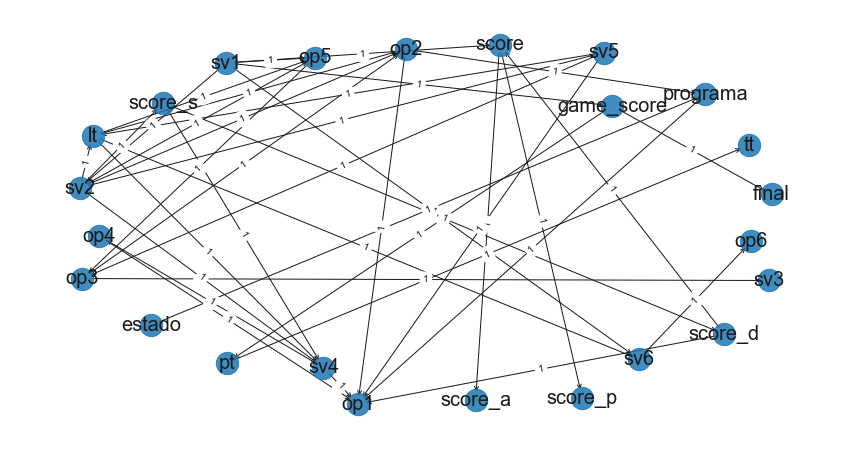

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+---------------------+---------------------+---------------------+
| sv2     | sv2(0)              | sv2(0)              | sv2(1)              | sv2(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| sv5     | sv5(0)              | sv5(1)              | sv5(0)              | sv5(1)              |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(0.0) | 0.1976284584980237  | 0.199203187250996   | 0.19767441860465115 | 0.3202416918429003  |
+---------+---------------------+---------------------+---------------------+---------------------+
| lt(1.0) | 0.1976284584980237  | 0.199203187250996   | 0.20155038759689922 | 0.21450151057401812 |
+---------+---------------------+---------------------+-------------------

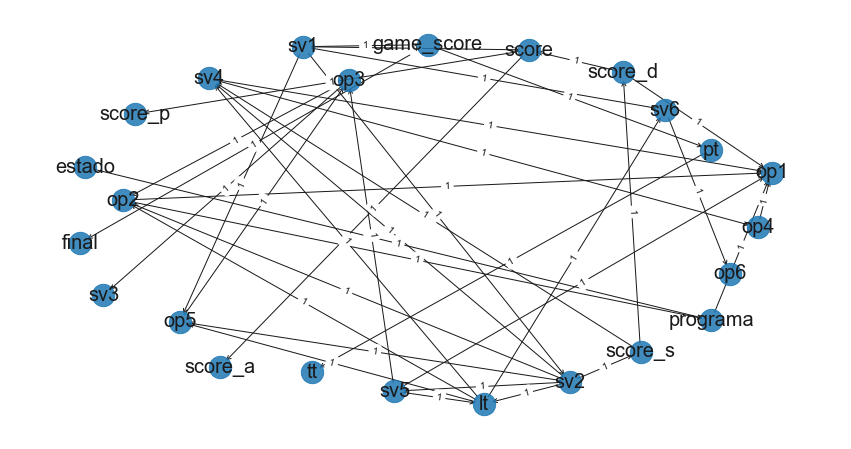

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final"


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5133 |
+-----------+---------------+
| estado(1) |        0.4867 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5133 |
+-----------+---------------+
| estado(1) |        0.4867 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":4.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":3.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5133 |
+-----------+---------------+
| estado(1) |        0.4867 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 214 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4, "fi



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]





+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]






+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]







+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..







Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:03, ?it/s]
Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5279 |
+-----------+---------------+
| estado(1) |        0.4721 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5230 |
+-----------+---------------+
| estado(1) |        0.4770 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5279 |
+-----------+---------------+
| estado(1) |        0.4721 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FIN DE SECCION DE PRUEBAS, FOLD:  4
largo de train:  374
(TRAIN) Fold 4 Precisión            : 0.0
(TRAIN) Fold 4 Precisión balanceada : 0.0
(TRAIN) Fold 4 Class Ratio          : 0.10427807486631016
largo de test :  93
(TEST) Fold 4 Precisión            : 0.8924731182

Finding Elimination Order: : : 0it [00:02, ?it/s]


[bnlearn] >Plot based on BayesianModel


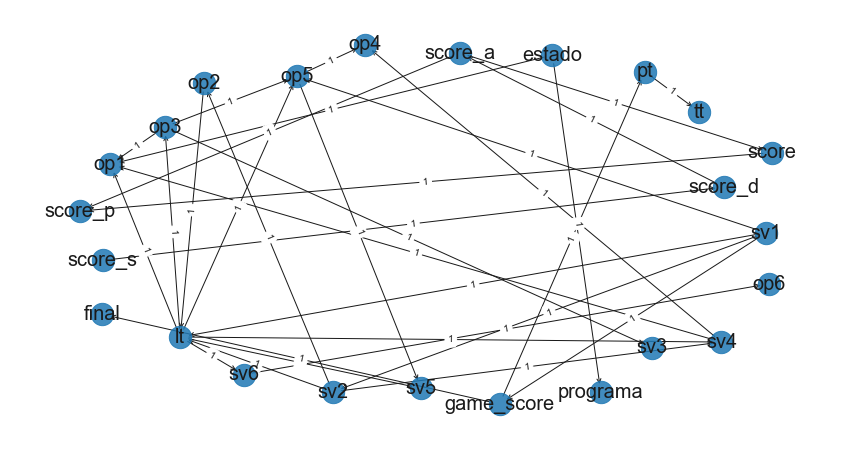

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+---------+---------------------+--------------------+---------------------+---------------------+--------+--------------------+--------+---------------------+
| op2     | op2(0)              | op2(0)             | op2(0)              | op2(0)              | op2(1) | op2(1)             | op2(1) | op2(1)              |
+---------+---------------------+--------------------+---------------------+---------------------+--------+--------------------+--------+---------------------+
| sv1     | sv1(0)              | sv1(0)             | sv1(1)              | sv1(1)              | sv1(0) | sv1(0)             | sv1(1) | sv1(1)              |
+---------+---------------------+--------------------+---------------------+---------------------+--------+--------------------+--------+---------------------+
| sv2     | sv2(0)              | sv2(1)             | sv2(0)             

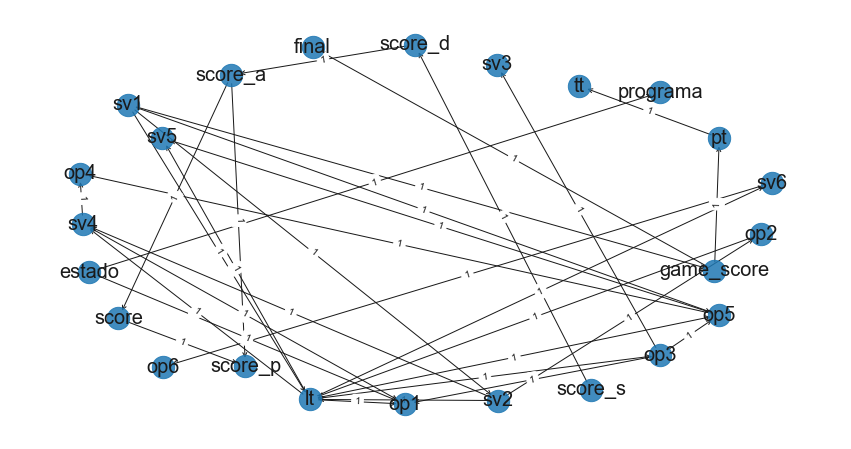

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

FILA N°: 0 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |       



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5364 |
+-----------+---------------+
| estado(1) |        0.4636 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5364 |
+-----------+---------------+
| estado(1) |        0.4636 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final"


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4942 |
+-----------+---------------+
| estado(1) |        0.5058 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6803 |
+-----------+---------------+
| estado(1) |        0.3197 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final

0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6094 |
+-----------+---------------+
| estado(1) |        0.3906 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5834 |
+-----------+---------------+
| estado(1) |        0.4166 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3974 |
+-----------+---------------+
| estado(1) |        0.6026 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6094 |
+-----------+---------------+
| estado(1) |        0.3906 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "fina


Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5516 |
+-----------+---------------+
| estado(1) |        0.4484 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6361 |
+-----------+---------------+
| estado(1) |        0.3639 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fina


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5834 |
+-----------+---------------+
| estado(1) |        0.4166 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5345 |
+-----------+---------------+
| estado(1) |        0.4655 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6625 |
+-----------+---------------+
| estado(1) |        0.3375 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6716 |
+-----------+---------------+
| estado(1) |        0.3284 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5232 |
+-----------+---------------+
| estado(1) |        0.4768 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6655 |
+-----------+---------------+
| estado(1) |        0.3345 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6891 |
+-----------+---------------+
| estado(1) |        0.3109 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]










+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6713 |
+-----------+---------------+
| estado(1) |        0.3287 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "programa":5, "final

0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5834 |
+-----------+---------------+
| estado(1) |        0.4166 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":4.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7152 |
+-----------+---------------+
| estado(1) |        0.2848 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "fina


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6988 |
+-----------+---------------+
| estado(1) |        0.3012 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [07:05, ?it/s]
Finding Elimination Order: : : 0it [05:55, ?it/s]
Finding Elimination Order: : : 0it [04:54, ?it/s]
Finding Elimination Order: : : 0it [04:14, ?it/s]
Finding Elimination Order: : : 0it [03:53, ?it/s]
Finding Elimination Order: : : 0it [02:42, ?it/s]
Finding Elimination Order: : : 0it [01:51, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6625 |
+-----------+---------------+
| estado(1) |        0.3375 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6387 |
+-----------+---------------+
| estado(1) |        0.3613 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6844 |
+-----------+---------------+
| estado(1) |        0.3156 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6463 |
+-----------+---------------+
| estado(1) |        0.3537 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6560 |
+-----------+---------------+
| estado(1) |        0.3440 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6988 |
+-----------+---------------+
| estado(1) |        0.3012 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5, "fina



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5799 |
+-----------+---------------+
| estado(1) |        0.4201 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6844 |
+-----------+---------------+
| estado(1) |        0.3156 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7304 |
+-----------+---------------+
| estado(1) |        0.2696 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fina


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7344 |
+-----------+---------------+
| estado(1) |        0.2656 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6361 |
+-----------+---------------+
| estado(1) |        0.3639 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"lt":3.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7139 |
+-----------+---------------+
| estado(1) |        0.2861 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6655 |
+-----------+---------------+
| estado(1) |        0.3345 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6803 |
+-----------+---------------+
| estado(1) |        0.3197 |
+-----------+---------------+
FILA N°: 116 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6713 |
+-----------+---------------+
| estado(1) |        0.3287 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6361 |
+-----------+---------------+
| estado(1) |        0.3639 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":3.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7139 |
+-----------+---------------+
| estado(1) |        0.2861 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4721 |
+-----------+---------------+
| estado(1) |        0.5279 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6202 |
+-----------+---------------+
| estado(1) |        0.3798 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6713 |
+-----------+---------------+
| estado(1) |        0.3287 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":0, "sv6":1, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6891 |
+-----------+---------------+
| estado(1) |        0.3109 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7224 |
+-----------+---------------+
| estado(1) |        0.2776 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4961 |
+-----------+---------------+
| estado(1) |        0.5039 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4942 |
+-----------+---------------+
| estado(1) |        0.5058 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "fin












0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6988 |
+-----------+---------------+
| estado(1) |        0.3012 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6605 |
+-----------+---------------+
| estado(1) |        0.3395 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:50, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5364 |
+-----------+---------------+
| estado(1) |        0.4636 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4942 |
+-----------+---------------+
| estado(1) |        0.5058 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6803 |
+-----------+---------------+
| estado(1) |        0.3197 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6988 |
+-----------+---------------+
| estado(1) |        0.3012 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:10, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5626 |
+-----------+---------------+
| estado(1) |        0.4374 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7224 |
+-----------+---------------+
| estado(1) |        0.2776 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5799 |
+-----------+---------------+
| estado(1) |        0.4201 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6988 |
+-----------+---------------+
| estado(1) |        0.3012 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5617 |
+-----------+---------------+
| estado(1) |        0.4383 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5364 |
+-----------+---------------+
| estado(1) |        0.4636 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6988 |
+-----------+---------------+
| estado(1) |        0.3012 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "fin

0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6713 |
+-----------+---------------+
| estado(1) |        0.3287 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "programa":4, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5511 |
+-----------+---------------+
| estado(1) |        0.4489 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6655 |
+-----------+---------------+
| estado(1) |        0.3345 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4942 |
+-----------+---------------+
| estado(1) |        0.5058 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [17:30, ?it/s]
Finding Elimination Order: : : 0it [16:30, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [16:39, ?it/s]
Finding Elimination Order: : : 0it [15:49, ?it/s]

Finding Elimination Order: : : 0it [16:08, ?it/s]

Finding Elimination Order: : : 0it [00:20, ?it/s]

Finding Elimination Order: : : 0it [16:48, ?it/s]
Finding Elimination Order: : : 0it [16:17, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [15:06, ?it/s]
Finding Elimination Order: : : 0it [14:36, ?it/s]


Finding Elimination Order: : : 0it [14:25, ?it/s]


Finding Elimination Order: : : 0it [14:05, ?it/s]



Finding Elimination Order: : : 0it [13:44, ?it/s]
Finding Elimination Order: : : 0it [12:24, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [11:03, ?it/s]
Finding Elimination Order: : : 0it [09:31, ?it/s]



Finding Elimination Order: : : 0it [09:21, ?it/s]



Finding Elimination Order

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6655 |
+-----------+---------------+
| estado(1) |        0.3345 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6625 |
+-----------+---------------+
| estado(1) |        0.3375 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6988 |
+-----------+---------------+
| estado(1) |        0.3012 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "f



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d"



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fi



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5834 |
+-----------+---------------+
| estado(1) |        0.4166 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5453 |
+-----------+---------------+
| estado(1) |        0.4547 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6094 |
+-----------+---------------+
| estado(1) |        0.3906 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6468 |
+-----------+---------------+
| estado(1) |        0.3532 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4638 |
+-----------+---------------+
| estado(1) |        0.5362 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5933 |
+-----------+---------------+
| estado(1) |        0.4067 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6844 |
+-----------+---------------+
| estado(1) |        0.3156 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7344 |
+-----------+---------------+
| estado(1) |        0.2656 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3974 |
+-----------+---------------+
| estado(1) |        0.6026 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6372 |
+-----------+---------------+
| estado(1) |        0.3628 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6514 |
+-----------+---------------+
| estado(1) |        0.3486 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4961 |
+-----------+---------------+
| estado(1) |        0.5039 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7224 |
+-----------+---------------+
| estado(1) |        0.2776 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6728 |
+-----------+---------------+
| estado(1) |        0.3272 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6716 |
+-----------+---------------+
| estado(1) |        0.3284 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5834 |
+-----------+---------------+
| estado(1) |        0.4166 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6891 |
+-----------+---------------+
| estado(1) |        0.3109 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7152 |
+-----------+---------------+
| estado(1) |        0.2848 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5617 |
+-----------+---------------+
| estado(1) |        0.4383 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6605 |
+-----------+---------------+
| estado(1) |        0.3395 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6012 |
+-----------+---------------+
| estado(1) |        0.3988 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5364 |
+-----------+---------------+
| estado(1) |        0.4636 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6560 |
+-----------+---------------+
| estado(1) |        0.3440 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6652 |
+-----------+---------------+
| estado(1) |        0.3348 |
+-----------+---------------+
FILA N°: 295 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6560 |
+-----------+---------------+
| estado(1) |        0.3440 |
+-----------+---------------+
FILA N°: 298 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "programa":5, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6206 |
+-----------+---------------+
| estado(1) |        0.3794 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6844 |
+-----------+---------------+
| estado(1) |        0.3156 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6652 |
+-----------+---------------+
| estado(1) |        0.3348 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6655 |
+-----------+---------------+
| estado(1) |        0.3345 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6514 |
+-----------+---------------+
| estado(1) |        0.3486 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6593 |
+-----------+---------------+
| estado(1) |        0.3407 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6468 |
+-----------+---------------+
| estado(1) |        0.3532 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6345 |
+-----------+---------------+
| estado(1) |        0.3655 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6625 |
+-----------+---------------+
| estado(1) |        0.3375 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6988 |
+-----------+---------------+
| estado(1) |        0.3012 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6716 |
+-----------+---------------+
| estado(1) |        0.3284 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6625 |
+-----------+---------------+
| estado(1) |        0.3375 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"lt":3.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6238 |
+-----------+---------------+
| estado(1) |        0.3762 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6716 |
+-----------+---------------+
| estado(1) |        0.3284 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6697 |
+-----------+---------------+
| estado(1) |        0.3303 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5866 |
+-----------+---------------+
| estado(1) |        0.4134 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "fin


Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6192 |
+-----------+---------------+
| estado(1) |        0.3808 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5516 |
+-----------+---------------+
| estado(1) |        0.4484 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7224 |
+-----------+---------------+
| estado(1) |        0.2776 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6560 |
+-----------+---------------+
| estado(1) |        0.3440 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5834 |
+-----------+---------------+
| estado(1) |        0.4166 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5516 |
+-----------+---------------+
| estado(1) |        0.4484 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6891 |
+-----------+---------------+
| estado(1) |        0.3109 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5516 |
+-----------+---------------+
| estado(1) |        0.4484 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":2, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5799 |
+-----------+---------------+
| estado(1) |        0.4201 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5177 |
+-----------+---------------+
| estado(1) |        0.4823 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6844 |
+-----------+---------------+
| estado(1) |        0.3156 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6891 |
+-----------+---------------+
| estado(1) |        0.3109 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6716 |
+-----------+---------------+
| estado(1) |        0.3284 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5177 |
+-----------+---------------+
| estado(1) |        0.4823 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6560 |
+-----------+---------------+
| estado(1) |        0.3440 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6298 |
+-----------+---------------+
| estado(1) |        0.3702 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5577 |
+-----------+---------------+
| estado(1) |        0.4423 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5834 |
+-----------+---------------+
| estado(1) |        0.4166 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6042 |
+-----------+---------------+
| estado(1) |        0.3958 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6420 |
+-----------+---------------+
| estado(1) |        0.3580 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4942 |
+-----------+---------------+
| estado(1) |        0.5058 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6844 |
+-----------+---------------+
| estado(1) |        0.3156 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6844 |
+-----------+---------------+
| estado(1) |        0.3156 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6345 |
+-----------+---------------+
| estado(1) |        0.3655 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5713 |
+-----------+---------------+
| estado(1) |        0.4287 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7127 |
+-----------+---------------+
| estado(1) |        0.2873 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "fi


Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4942 |
+-----------+---------------+
| estado(1) |        0.5058 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5617 |
+-----------+---------------+
| estado(1) |        0.4383 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4786 |
+-----------+---------------+
| estado(1) |        0.5214 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "fi



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6605 |
+-----------+---------------+
| estado(1) |        0.3395 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fin



0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [01:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4942 |
+-----------+---------------+
| estado(1) |        0.5058 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "fin

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7361 |
+-----------+---------------+
| estado(1) |        0.2639 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6514 |
+-----------+---------------+
| estado(1) |        0.3486 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]









+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "fin

0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:50, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6453 |
+-----------+---------------+
| estado(1) |        0.3547 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7782 |
+-----------+---------------+
| estado(1) |        0.2218 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6206 |
+-----------+---------------+
| estado(1) |        0.3794 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7181 |
+-----------+---------------+
| estado(1) |        0.2819 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6345 |
+-----------+---------------+
| estado(1) |        0.3655 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7201 |
+-----------+---------------+
| estado(1) |        0.2799 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6316 |
+-----------+---------------+
| estado(1) |        0.3684 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6514 |
+-----------+---------------+
| estado(1) |        0.3486 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5617 |
+-----------+---------------+
| estado(1) |        0.4383 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7004 |
+-----------+---------------+
| estado(1) |        0.2996 |
+-----------+---------------+
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  5
INICIO DE SECCION DE PRUEBAS, FOLD:  5
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel



Finding Elimination Order: : : 0it [00:20, ?it/s]


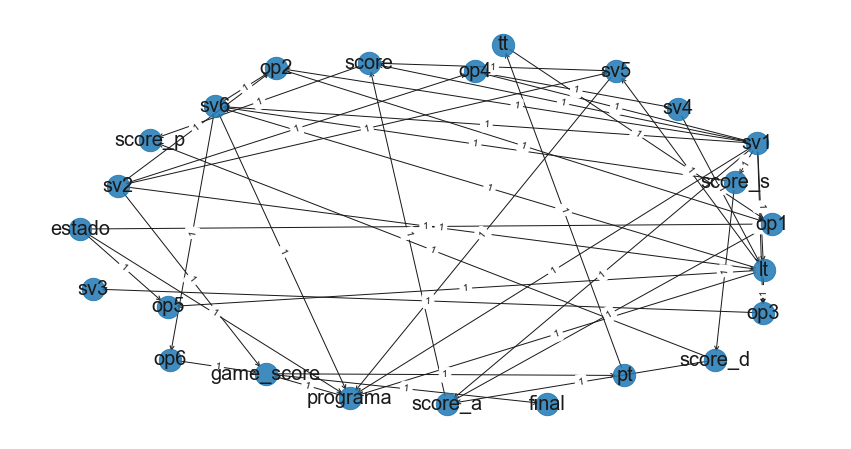

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.


Finding Elimination Order: : : 0it [1:00:09, ?it/s]
Finding Elimination Order: : : 0it [48:38, ?it/s]
Finding Elimination Order: : : 0it [07:14, ?it/s]
Finding Elimination Order: : : 0it [06:53, ?it/s]
Finding Elimination Order: : : 0it [06:03, ?it/s]
Finding Elimination Order: : : 0it [05:12, ?it/s]
Finding Elimination Order: : : 0it [04:12, ?it/s]
Finding Elimination Order: : : 0it [03:11, ?it/s]


CPD of lt:
+---------+--------------------+--------------------+--------------------+---------------------+--------------------+---------------------+---------------------+---------------------+
| sv1     | sv1(0)             | sv1(0)             | sv1(0)             | sv1(0)              | sv1(1)             | sv1(1)              | sv1(1)              | sv1(1)              |
+---------+--------------------+--------------------+--------------------+---------------------+--------------------+---------------------+---------------------+---------------------+
| sv2     | sv2(0)             | sv2(0)             | sv2(1)             | sv2(1)              | sv2(0)             | sv2(0)              | sv2(1)              | sv2(1)              |
+---------+--------------------+--------------------+--------------------+---------------------+--------------------+---------------------+---------------------+---------------------+
| sv4     | sv4(0)             | sv4(1)             | sv4(0)         

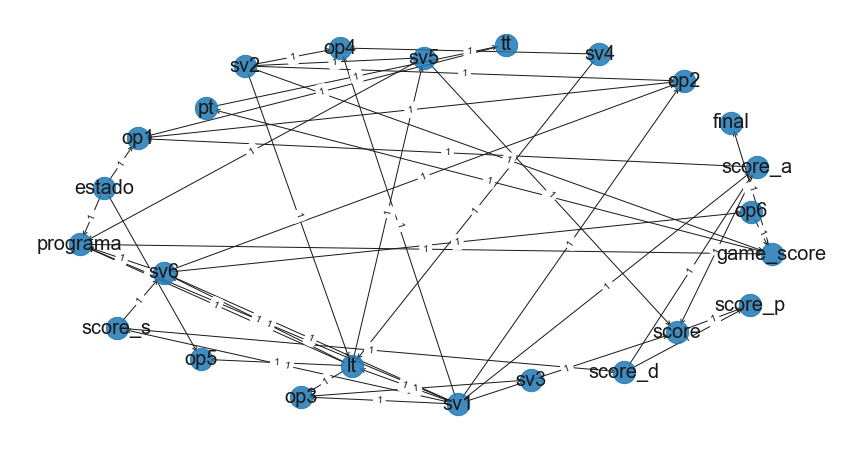

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



FILA N°: 3 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5037 |
+-----------+---------------+
| estado(1) |        0.4963 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4859 |
+-----------+---------------+
| estado(1) |        0.5141 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3032 |
+-----------+---------------+
| estado(1) |        0.6968 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final"


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5195 |
+-----------+---------------+
| estado(1) |        0.4805 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2411 |
+-----------+---------------+
| estado(1) |        0.7589 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3854 |
+-----------+---------------+
| estado(1) |        0.6146 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3854 |
+-----------+---------------+
| estado(1) |        0.6146 |
+-----------+---------------+
FILA N°: 37 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]




+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3757 |
+-----------+---------------+
| estado(1) |        0.6243 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:30, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4287 |
+-----------+---------------+
| estado(1) |        0.5713 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6525 |
+-----------+---------------+
| estado(1) |        0.3475 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:40, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7348 |
+-----------+---------------+
| estado(1) |        0.2652 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7294 |
+-----------+---------------+
| estado(1) |        0.2706 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "fina






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [01:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6374 |
+-----------+---------------+
| estado(1) |        0.3626 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:30, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6319 |
+-----------+---------------+
| estado(1) |        0.3681 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3587 |
+-----------+---------------+
| estado(1) |        0.6413 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7346 |
+-----------+---------------+
| estado(1) |        0.2654 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4597 |
+-----------+---------------+
| estado(1) |        0.5403 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5425 |
+-----------+---------------+
| estado(1) |        0.4575 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4603 |
+-----------+---------------+
| estado(1) |        0.5397 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5224 |
+-----------+---------------+
| estado(1) |        0.4776 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7514 |
+-----------+---------------+
| estado(1) |        0.2486 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]












+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7076 |
+-----------+---------------+
| estado(1) |        0.2924 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6306 |
+-----------+---------------+
| estado(1) |        0.3694 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3, "fin

0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:30, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6282 |
+-----------+---------------+
| estado(1) |        0.3718 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4597 |
+-----------+---------------+
| estado(1) |        0.5403 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "fin













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6549 |
+-----------+---------------+
| estado(1) |        0.3451 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7299 |
+-----------+---------------+
| estado(1) |        0.2701 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5, "fi














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:40, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7036 |
+-----------+---------------+
| estado(1) |        0.2964 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6911 |
+-----------+---------------+
| estado(1) |        0.3089 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "f

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5115 |
+-----------+---------------+
| estado(1) |        0.4885 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6705 |
+-----------+---------------+
| estado(1) |        0.3295 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4158 |
+-----------+---------------+
| estado(1) |        0.5842 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5683 |
+-----------+---------------+
| estado(1) |        0.4317 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7299 |
+-----------+---------------+
| estado(1) |        0.2701 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5683 |
+-----------+---------------+
| estado(1) |        0.4317 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6282 |
+-----------+---------------+
| estado(1) |        0.3718 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":4.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6579 |
+-----------+---------------+
| estado(1) |        0.3421 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6875 |
+-----------+---------------+
| estado(1) |        0.3125 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6574 |
+-----------+---------------+
| estado(1) |        0.3426 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6283 |
+-----------+---------------+
| estado(1) |        0.3717 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6183 |
+-----------+---------------+
| estado(1) |        0.3817 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2, "fin















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5169 |
+-----------+---------------+
| estado(1) |        0.4831 |
+-----------+---------------+
FILA N°: 226 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7299 |
+-----------+---------------+
| estado(1) |        0.2701 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4481 |
+-----------+---------------+
| estado(1) |        0.5519 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5909 |
+-----------+---------------+
| estado(1) |        0.4091 |
+-----------+---------------+
FILA N°: 251 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "programa":5, "fin














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7298 |
+-----------+---------------+
| estado(1) |        0.2702 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5431 |
+-----------+---------------+
| estado(1) |        0.4569 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6324 |
+-----------+---------------+
| estado(1) |        0.3676 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6268 |
+-----------+---------------+
| estado(1) |        0.3732 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2, "fin















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5961 |
+-----------+---------------+
| estado(1) |        0.4039 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6989 |
+-----------+---------------+
| estado(1) |        0.3011 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5850 |
+-----------+---------------+
| estado(1) |        0.4150 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7191 |
+-----------+---------------+
| estado(1) |        0.2809 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:30, ?it/s]

Finding Elimination Order: : : 0it [01:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5525 |
+-----------+---------------+
| estado(1) |        0.4475 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4603 |
+-----------+---------------+
| estado(1) |        0.5397 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]

















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7346 |
+-----------+---------------+
| estado(1) |        0.2654 |
+-----------+---------------+
FILA N°: 290 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6519 |
+-----------+---------------+
| estado(1) |        0.3481 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi

0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:30, ?it/s]

Finding Elimination Order: : : 0it [01:10, ?it/s]
0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7346 |
+-----------+---------------+
| estado(1) |        0.2654 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4906 |
+-----------+---------------+
| estado(1) |        0.5094 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "fin















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6341 |
+-----------+---------------+
| estado(1) |        0.3659 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4064 |
+-----------+---------------+
| estado(1) |        0.5936 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4, "fin


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6585 |
+-----------+---------------+
| estado(1) |        0.3415 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7403 |
+-----------+---------------+
| estado(1) |        0.2597 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "fin



















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6627 |
+-----------+---------------+
| estado(1) |        0.3373 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7171 |
+-----------+---------------+
| estado(1) |        0.2829 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fin



















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5412 |
+-----------+---------------+
| estado(1) |        0.4588 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6057 |
+-----------+---------------+
| estado(1) |        0.3943 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2, "fi





















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:50, ?it/s][A



















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6268 |
+-----------+---------------+
| estado(1) |        0.3732 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3548 |
+-----------+---------------+
| estado(1) |        0.6452 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6965 |
+-----------+---------------+
| estado(1) |        0.3035 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [01:00, ?it/s][A



















Finding Elimination Order: : : 0it [01:40, ?it/s][A
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6268 |
+-----------+---------------+
| estado(1) |        0.3732 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..






















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7514 |
+-----------+---------------+
| estado(1) |        0.2486 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6585 |
+-----------+---------------+
| estado(1) |        0.3415 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...





































Finding Elimination Order: : : 0it [01:30, ?it/s]
0it [00:10, ?it/s]    





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6640 |
+-----------+---------------+
| estado(1) |        0.3360 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6378 |
+-----------+---------------+
| estado(1) |        0.3622 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6628 |
+-----------+---------------+
| estado(1) |        0.3372 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7060 |
+-----------+---------------+
| estado(1) |        0.2940 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...




















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7036 |
+-----------+---------------+
| estado(1) |        0.2964 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5958 |
+-----------+---------------+
| estado(1) |        0.4042 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6554 |
+-----------+---------------+
| estado(1) |        0.3446 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6076 |
+-----------+---------------+
| estado(1) |        0.3924 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7086 |
+-----------+---------------+
| estado(1) |        0.2914 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fin




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















Finding Elimination Order: : : 0it [00:50, ?it/s]



















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [02:00, ?it/s][A



















Finding Elimination Order: : : 0it [01:50, ?it/s][A
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7389 |
+-----------+---------------+
| estado(1) |        0.2611 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..






















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...





































Finding Elimination Order: : : 0it [01:30, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6173 |
+-----------+---------------+
| estado(1) |        0.3827 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7727 |
+-----------+---------------+
| estado(1) |        0.2273 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi


0it [00:10, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6628 |
+-----------+---------------+
| estado(1) |        0.3372 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7727 |
+-----------+---------------+
| estado(1) |        0.2273 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fin





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [00:50, ?it/s][A





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7025 |
+-----------+---------------+
| estado(1) |        0.2975 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]    



















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6268 |
+-----------+---------------+
| estado(1) |        0.3732 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7060 |
+-----------+---------------+
| estado(1) |        0.2940 |
+-----------+---------------+
FIN DE SECCION DE PRUEBAS, FOLD:  5
largo de train:  374
(TRAIN) Fold 5 Precisión            : 0.8689839572192514
(TRAIN) Fold 5 Precisión balanceada : 0.621998078770413
(TRAIN) Fold 5 Class Ratio          : 0.10695187165775401
largo de test :  93
(TEST) Fold 5 Preci

In [22]:
import bnlearn as bn

#indica cual va a ser el muestreo estratificado usando la clase "estado"
#cada fold mantiene la proporcion orignal de clases
#n_splits = el numero de experimentos a realizar
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
target = df.loc[:, 'estado'] #todas las filas de la columna "estado"

fold_no = 1
for train_index, test_index in skf.split(df, target):
    #---------------------------------------------------------------------------
    #INICIO: SECCION DE ENTRENAMIENTO
    #---------------------------------------------------------------------------
    print("INICIO DE SECCION DE ENTRENAMIENTO, FOLD: ", str(fold_no))
    
    #entrega la porción de datos que serán usados como entrenamiento
    train = df.loc[train_index,:] #todas las columnas de la fila "train_index"
    
    #aprendiendo la estructura y los parametros de la porción de datos entrenados
    modelo = bl.Aprendizaje(train)
    
    #transformando el modelo aprendido en un dataset que pueda ser inferido
    newModel = bl.modelToDataFrame(modelo, train)

    #realizando la inferencia de los datos de entrenamiento
    probTrain = bl.probabilidadConjunta(modelo, newModel)
            
    i = 0 #columna que queremos obtener
    lista_train = [fila[i] for fila in probTrain]

    print("FIN DE SECCION DE ENTRENAMIENTO, FOLD: ", str(fold_no))
    #---------------------------------------------------------------------------
    #FIN: SECCION DE ENTRENAMIENTO
    #---------------------------------------------------------------------------

    #---------------------------------------------------------------------------
    #INICIO: SECCION DE PRUEBAS
    #---------------------------------------------------------------------------
    print("INICIO DE SECCION DE PRUEBAS, FOLD: ", str(fold_no))
    
    #entrega la porción de datos que serán usados como pruebas
    test = df.loc[test_index,:] #todas las columnas de la fila "test_index"
        
    #aprendiendo la estructura y los parametros de la porción de datos de pruebas
    modelo = bl.Aprendizaje(test)

    #transformando el modelo aprendido en un dataset que pueda ser inferido
    newModel = bl.modelToDataFrame(modelo, test)
    
    #realizando la inferencia de los datos de prueba
    probTest = bl.probabilidadConjunta(modelo, newModel)
    
    i = 0 #columna que queremos obtener
    lista_test = [fila[i] for fila in probTest]
    
    print("FIN DE SECCION DE PRUEBAS, FOLD: ", str(fold_no))
    #---------------------------------------------------------------------------
    #FIN: SECCION DE PRUEBAS
    #---------------------------------------------------------------------------

    #---------------------------------------------------------------------------
    #INICIO: MOSTRANDO LOS RESULTADOS DEL ENTRANAMIENTO Y LAS PRUEBAS
    #---------------------------------------------------------------------------
    print('largo de train: ', len(train))
    print('(TRAIN) Fold', str(fold_no), 'Precisión            :', accuracy_score(lista_train, train.loc[:, 'estado']))  
    print('(TRAIN) Fold', str(fold_no), 'Precisión balanceada :', balanced_accuracy_score(lista_train, train.loc[:, 'estado']))  
    print('(TRAIN) Fold', str(fold_no), 'Class Ratio          :', sum(train['estado'])/len(train['estado']))

    print('largo de test : ', len(test))   
    print('(TEST) Fold', str(fold_no), 'Precisión            :', accuracy_score(lista_test, test.loc[:, 'estado']))  
    print('(TEST) Fold', str(fold_no), 'Precisión balanceada :', balanced_accuracy_score(lista_test, test.loc[:, 'estado']))  
    print('(TEST) Fold', str(fold_no), 'Class Ratio          :', sum(test['estado'])/len(test['estado']))
    
    fold_no += 1